# Housing Project

## problem statement:
    - The company suprise houses is looking at the prospective properties to buy houses to enter the market.
## Questions to answer:
    - Which variables are important to predict the price of variable?
    - How do these variables describe the price of the house ?




# Loading the dataset

### import the libraries

In [1]:
# important librares 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

#import warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the dataset 
house = pd.read_csv("test.csv")

In [3]:
#display the first 5 records 
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [4]:
#gather the data type and null value count in the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

#### Observations


- There are many null values present in the dataset 
- The data contains a combination of categorical and numerical values 


In [5]:
house.shape

(292, 80)

In [6]:
#finding the descriptive statistics of the dataset.
house.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count   292.000000   292.000000    292.000000   291.000000   292.000000  ...   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521  ...   
std       1.063267    30.447016     20.105792   175.030021   429.559675  ...   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000  ...   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000  ...   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000  ...   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  292.000000   292.000000     292.000000  292.000000   292.000000   
mean    86.397260    47.061644      17.708904    2.489726    15.099315   
std    121.898836    65.865449      51.892906   30.247488    58.483473   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000    28.500000       0.000000    0.000000     0.000000   
75%    149.250000    66.000000       0.000000    0.000000     0.000000   
max    728.000000   418.000000     330.000000  407.000000   396.000000   

       PoolArea  PoolQC      MiscVal      MoSold       YrSold  
count     292.0     0.0   292.000000  292.000000   292.000000  
mean        0.0     NaN    28.184932    6.232877  2007.859589  
std         0.0     NaN   224.036218    2.774556     1.322867  
min         0.0     NaN     0.000000    1.000000  2006.000000  
25%         0.0     NaN     0.000000    4.000000  2007.000000  
50%         0.0     NaN     0.000000    6.000000  2008.000000  
75%         0.0     NaN     0.000000    8.000000  2009.000000  
max         0.0     NaN  3500.000000   12.000000  2010.000000  

[8 rows x 38 columns]

# Identify the types of problems(Regression/Classification)

In [7]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

- Since, the sale price column is of numeric type the data can be handled as a regression problem

 - supervised
    - Regression
#### The evaluation metrics are:
  - R2 score
  - MSE
  - RMSE

# EDA-Exploratory Data Analysis

#### Summary statistics 

In [8]:
#descriptive statistics for the first 10 columns 
first_10 = house.iloc[:, :10]

#### categorical values 

In [9]:
#analysing the categorical descriptive statistics 
first_10.describe(include = 'object')

MSZoning Street Alley LotShape LandContour Utilities
count       292    292    14      292         292       292
unique        4      2     2        4           4         2
top          RL   Pave  Grvl      Reg         Lvl    AllPub
freq        223    290     9      185         265       291

### Univariate analysis

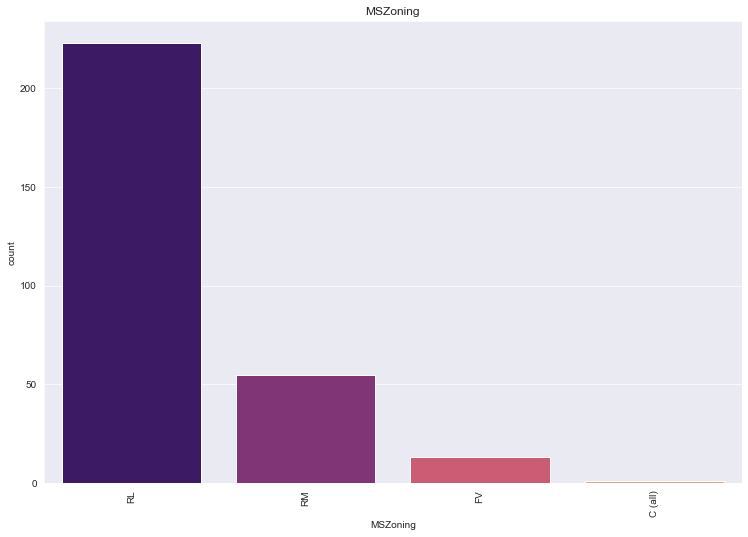

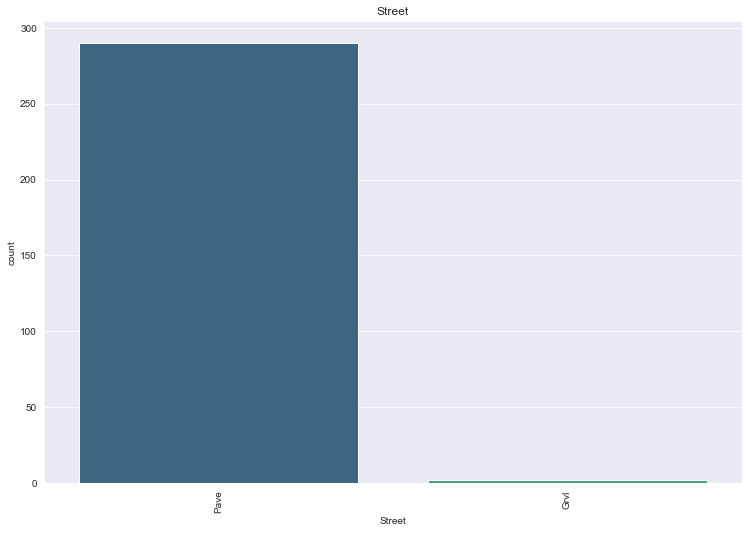

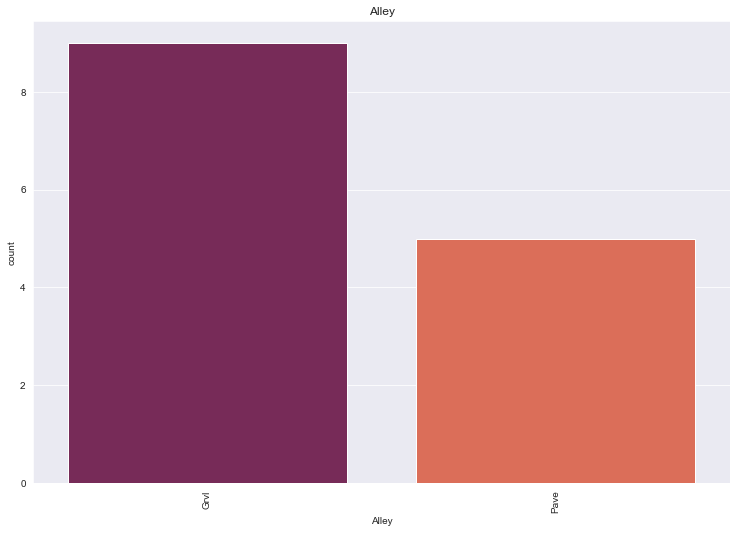

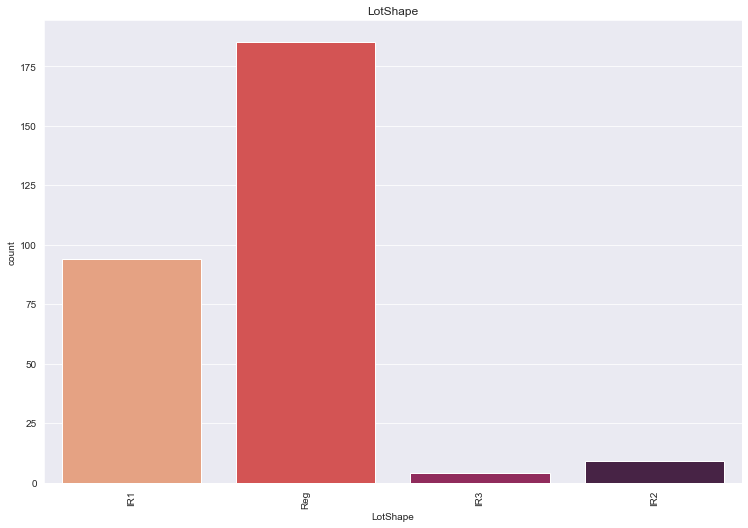

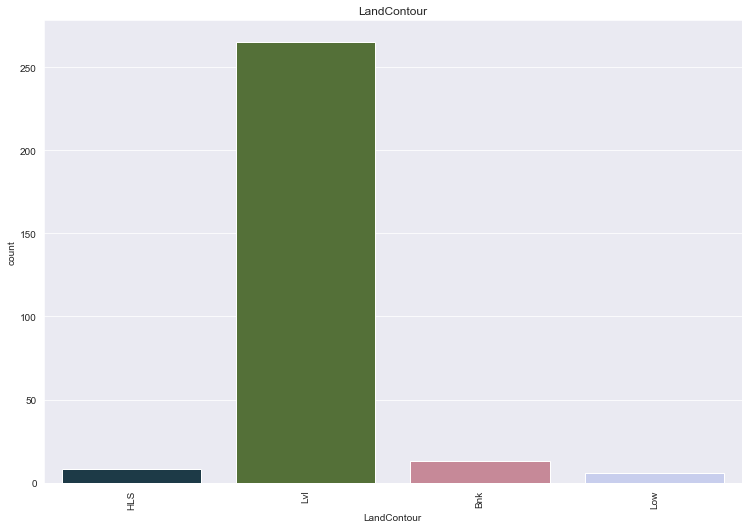

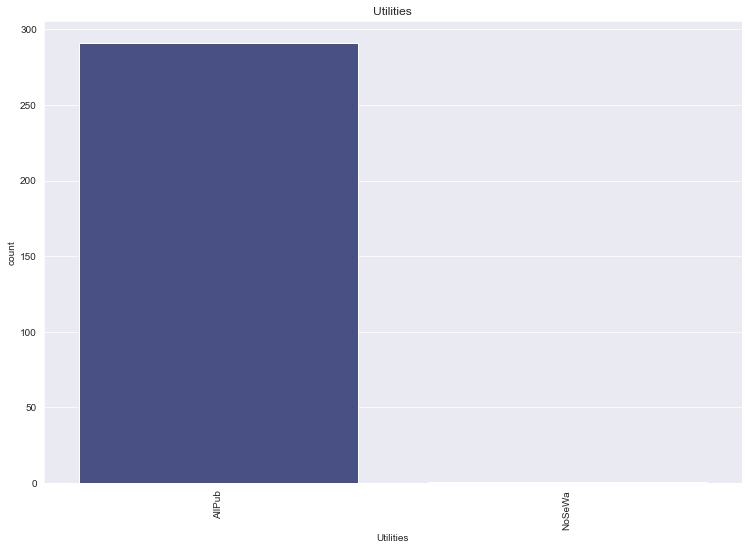

In [10]:
sns.set_style("darkgrid")

# MSZoning -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='MSZoning', 
    data = house,
    palette = 'magma'
).set_title('MSZoning')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Street -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Street',
    data = house,
    palette = 'viridis'
).set_title('Street')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)


# Alley -plot a bar chart
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Alley', 
    data = house,
    palette = 'rocket'
).set_title('Alley')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# LotShape -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='LotShape', 
    data = house,
    palette = 'rocket_r'
).set_title('LotShape')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# LandContour -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='LandContour', 
    data = house,
    palette = 'cubehelix'
).set_title('LandContour')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Utilities -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Utilities', 
    data = house,
    palette = 'mako'
).set_title('Utilities')
plt.xticks(rotation = 90)
plt.show()

### Observations


   - There are 1168 records with 5 unique values and  RL = Residential Low Density is the top most value with a frequency of 928 counts.
   - There are 1168 records with 2 unique values and  Pave= Paved road access is the topmost value with a frequency of 1164.
   - There are 77 records with 2 unique values and Grvl = Gravel alley access is the topmost value with a frequency of 41 
   - There are 1168 records with 4 unique values and Reg= Regular is the topmost value with a frequency of 740
   - There are 1168 records with 4 unique values and Lvl = Near Flat/Level is the topmost value with a frequency of 1046
   - There are 1168 records with 1 unique values and AllPu = All public Utilities (E,G,W,& S) is the topmost value with a frequency of 1168
 #### We can drop the column alley, since, it has more than 50% of the records as nan   
 #### we can drop the column utilities, since, the column contians singular value. Therefore, the prediction might become one-sided affecting the predictive capabilities of the model.
 

#### numerical values 

In [11]:
first_10.describe()

Id  MSSubClass  LotFrontage        LotArea
count   292.000000  292.000000   247.000000     292.000000
mean    755.955479   57.414384    66.425101   10645.143836
std     442.565228   43.780649    21.726343   13330.669795
min       6.000000   20.000000    21.000000    1526.000000
25%     377.750000   20.000000    53.500000    7200.000000
50%     778.000000   50.000000    65.000000    9200.000000
75%    1152.250000   70.000000    79.000000   11658.750000
max    1456.000000  190.000000   150.000000  215245.000000

###  finding skewness
- skewness is a measure of symmetry in a distribution. lack of symmetry
- A standard normal distribution is perfectly symmetrical and has zero skew.
- Calculation for skewness


In [12]:
# function to cal skew value for short reference
def skew(mean, median, std):
    skew = 3*(mean-median)/std
    return skew
    

In [13]:
def find_left_right(mean, median, std):
    value = skew(mean, median, std)
    if value > -3 and value < 3:
        return(str(value) + " is "+ "not skewed")
    else:
        return(str(value) + " is " +"skewed")
    

In [14]:

print("id : " +find_left_right(724.136130,714.500000,416.159877))
print("MSSubClass : " +find_left_right(56.767979,50.000000,41.940650))
print("LotFrontage : " + find_left_right(70.98847,70.00000,24.82875))
print("LotArea : " +find_left_right(56.767979,10484.749144,8957.442311))

id : 0.06946462549055382 is not skewed
MSSubClass : 0.48411116661282055 is not skewed
LotFrontage : 0.11943452650657081 is not skewed
LotArea : -3.492508509553269 is skewed


### Bivariate and univariate analysis

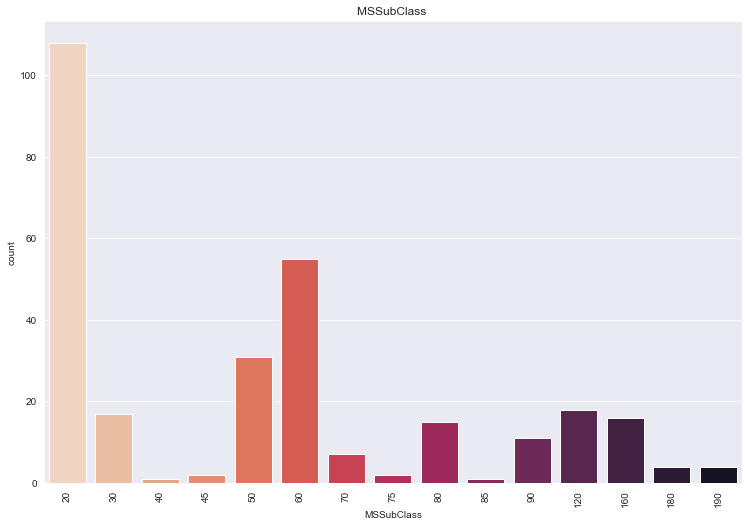

'\ntime.sleep(1)\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 8.5)\n#LotFrontage -> reg plot\nsns.regplot(x="LotFrontage",\n            y="SalePrice",\n           data = house,\n           color = \'g\',\n            ci= None\n            ).set_title("LotFrontage")\nplt.show()\n\ntime.sleep(1)\n\n#LotArea-> reg plot\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 8.5)\nsns.regplot(x="LotArea",\n            y="SalePrice",\n           data = house,\n           color = \'g\',\n            ci= None\n            ).set_title("LotArea")\nplt.show()'

In [15]:

"""fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#id -> reg plot
sns.regplot(x="Id",
            y="SalePrice",
           data = house,
           color = 'g'
            ).set_title("ID")
plt.show()"""

time.sleep(1)
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
# MSSubClass  -plot a bar chart 
sns.countplot(
    x='MSSubClass', 
    data = house,
    palette = 'rocket_r'
).set_title('MSSubClass ')
plt.xticks(rotation = 90)
plt.show()
"""
time.sleep(1)
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#LotFrontage -> reg plot
sns.regplot(x="LotFrontage",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("LotFrontage")
plt.show()

time.sleep(1)

#LotArea-> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.regplot(x="LotArea",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("LotArea")
plt.show()"""

## Observations

- The lot area is left skewed 
- The use of id column as minimal importance for the model. Therefore, id column can be dropped.



## ----------------------------------------------- first summary stat ----------------------------------------------

In [16]:
# analysing rest of the records
next_10 = house.iloc[:, 10:20]

In [17]:
#analysing the categorical variables 
next_10.describe(include = 'object')

LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count        292       292          292        292        292      292   
unique         5         3           24          8          2        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq         210       277           43        255        291      239   

       HouseStyle  
count         292  
unique          8  
top        1Story  
freq          148

### Univariate analysis

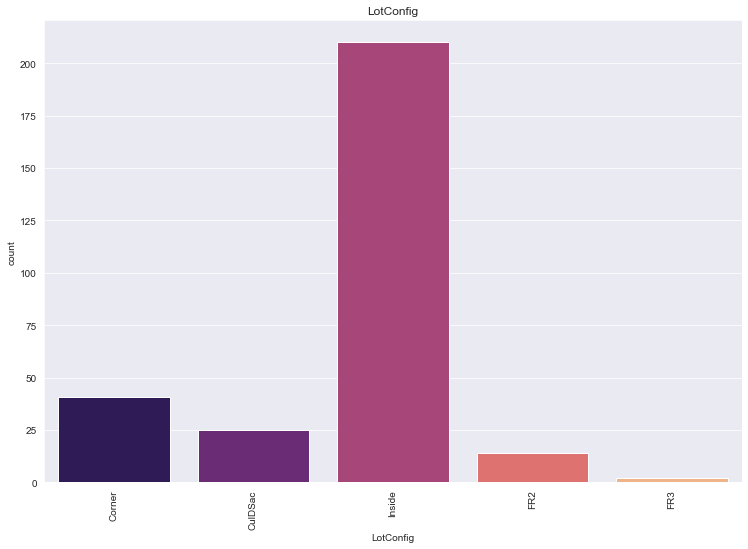

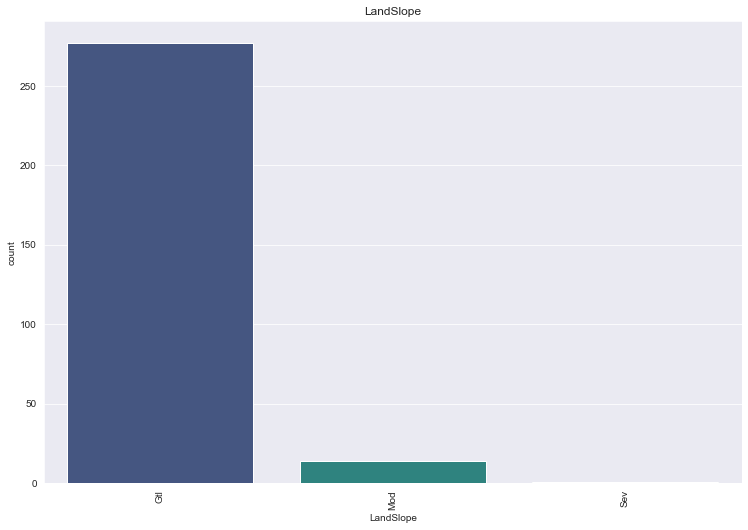

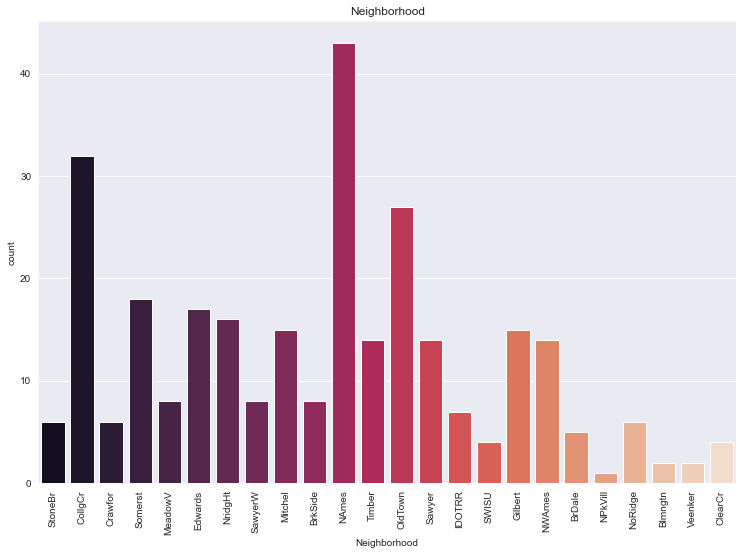

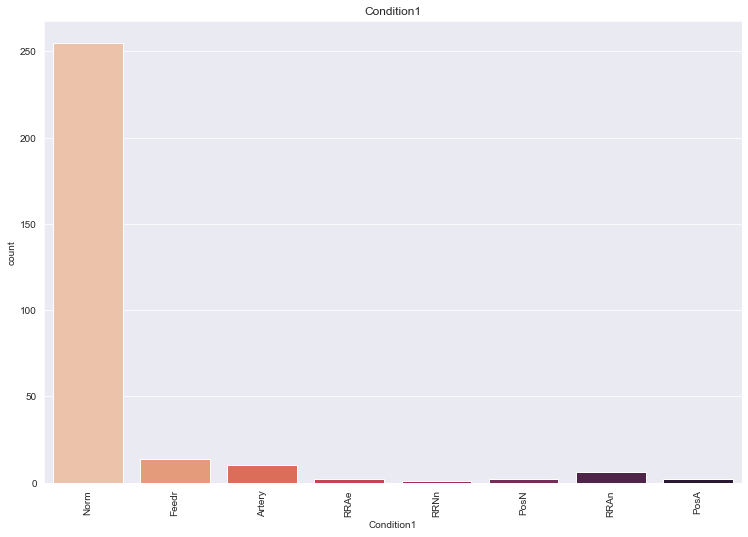

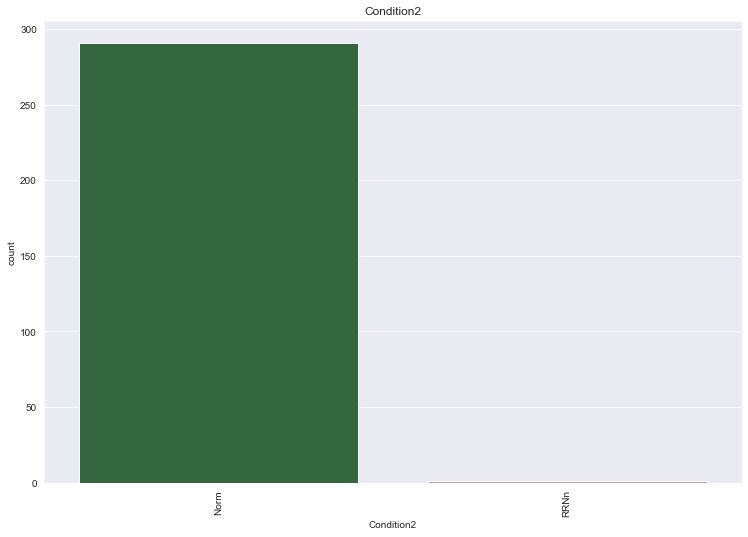

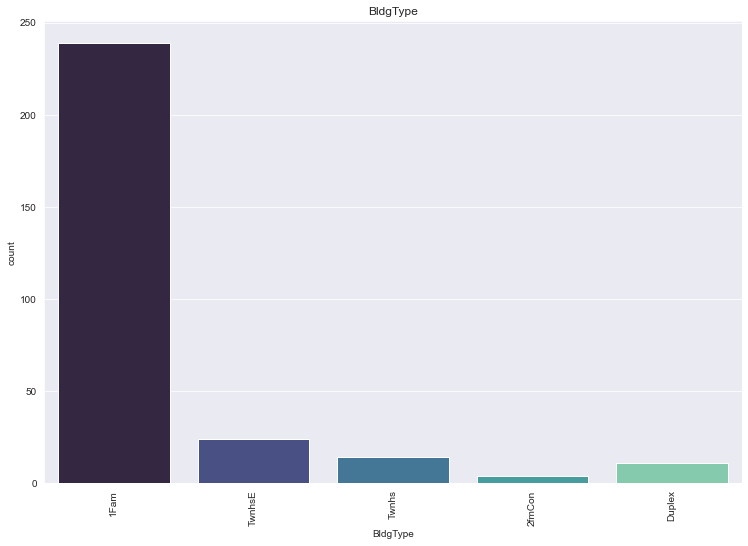

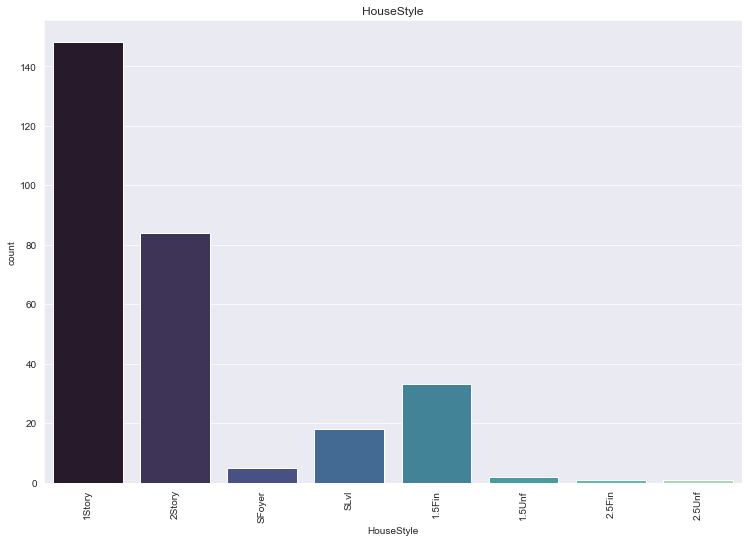

In [18]:
# LotConfig -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='LotConfig', 
    data = house,
    palette = 'magma'
).set_title('LotConfig')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# LandSlope -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='LandSlope',
    data = house,
    palette = 'viridis'
).set_title('LandSlope')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)


# Neighborhood -plot a bar chart
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Neighborhood', 
    data = house,
    palette = 'rocket'
).set_title('Neighborhood')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Condition1 -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Condition1', 
    data = house,
    palette = 'rocket_r'
).set_title('Condition1')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Condition2 -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Condition2', 
    data = house,
    palette = 'cubehelix'
).set_title('Condition2')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# BldgType -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='BldgType', 
    data = house,
    palette = 'mako'
).set_title('BldgType')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# HouseStyle -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='HouseStyle', 
    data = house,
    palette = 'mako'
).set_title('HouseStyle')
plt.xticks(rotation = 90)
plt.show()

## Observations 

- There are 1168 records with 5 unique values and LotConfig = Inside is the topmost value  with a frequency of 842 
- There are 1168 records with 3 unique values and LandSlope = Gtl is the topmost value  with a frequency of 1105
- There are 1168 records with 25 unique values and Neighborhood = Names is the topmost value  with a frequency of 182
- There are 1168 records with 9 unique values and condition1 = Norm is the topmost value with a frequency of 1005
- There are 1168 records with 8 unique values and condition2 = Norm is the topmost value with a frequenct of 981
- There are 1168 records with 5 uniques values and BldgType = 1Fam is the topmost value with a frequency of 981
- There are 1168 records with 8 unique values and HouseStyle = 1story is the topmost value with a frequency of 578



In [19]:
next_10.describe()

OverallQual  OverallCond    YearBuilt
count   292.000000   292.000000   292.000000
mean      6.078767     5.493151  1972.616438
std       1.356147     1.063267    30.447016
min       3.000000     3.000000  1872.000000
25%       5.000000     5.000000  1954.000000
50%       6.000000     5.000000  1976.000000
75%       7.000000     6.000000  2001.000000
max      10.000000     9.000000  2009.000000

In [20]:
# fiding skewness 
print("OverallQual : " +find_left_right(6.104452,6.000000,1.390153))
print("OverallCond : " +find_left_right(5.595890,5.000000,1.124343))



OverallQual : 0.22541115977881618 is not skewed
OverallCond : 1.5899685416283103 is not skewed


## Univariate and bivariate analysis

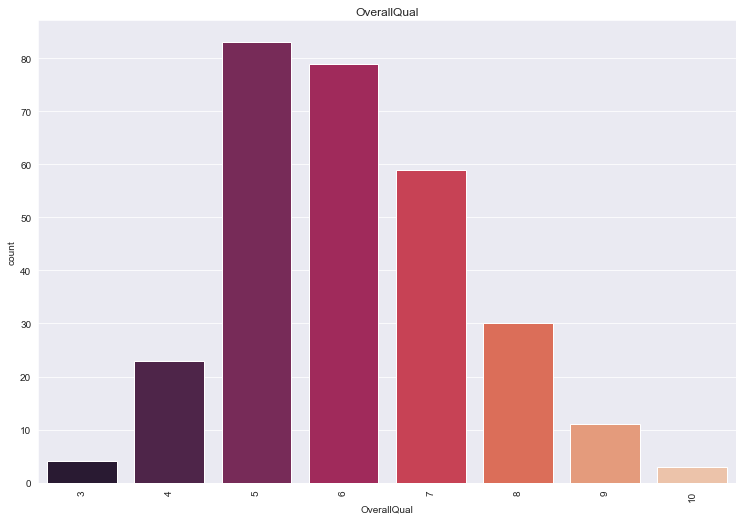

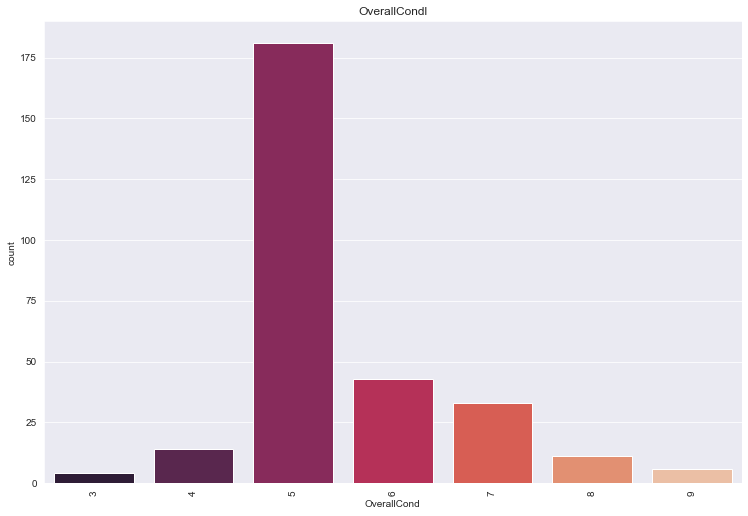

"# year bulit - > time-series plot\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 8.5)\n#create time series plot\nsns.lineplot(x = 'YearBuilt',\n              y= 'SalePrice',\n              linestyle = 'solid',\n             data = house,\n             color = 'r'\n             )\nplt.xticks(rotation = 90)\nplt.show()"

In [21]:
"""fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#OverallQual -> reg plot
sns.regplot(x="OverallQual",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("OverallQual")
plt.show()
time.sleep(1)"""
# OverallQual -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='OverallQual', 
    data = house,
    palette = 'rocket'
).set_title('OverallQual')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)
"""
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#OverallQual -> reg plot
sns.regplot(x="OverallCond",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("OverallCond")
plt.show()
time.sleep(1)"""

#OverallCond -> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='OverallCond', 
    data = house,
    palette = 'rocket'
).set_title('OverallCondl')
plt.xticks(rotation = 90)
plt.show()




"""# year bulit - > time-series plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#create time series plot
sns.lineplot(x = 'YearBuilt',
              y= 'SalePrice',
              linestyle = 'solid',
             data = house,
             color = 'r'
             )
plt.xticks(rotation = 90)
plt.show()"""

### Observation
- The OverallQual and Overall cond are not skewed



## ----------------------------------------------- second summary stat ----------------------------------------------

In [22]:
#exploring rest of the variables 
next_10_2 = house.iloc[:, 20:30]
#categorical analysis
next_10_2.describe(include = 'object')

RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count        292      292         292         292        291       292   
unique         5        3          12          14          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq         226      290         119         117        168       189   

       ExterCond Foundation  
count        292        292  
unique         4          6  
top           TA      PConc  
freq         260        134

In [23]:
MasVnrType_percentage = (696/1161)*100
print("The percentage of null values in MasVnrType: " + str(MasVnrType_percentage))

The percentage of null values in MasVnrType: 59.9483204134367


In [24]:
RoofMatl_percentage = (1144/1168)*100
print("The percentage of null values in RoofMatl: " + str(RoofMatl_percentage))

The percentage of null values in RoofMatl: 97.94520547945206


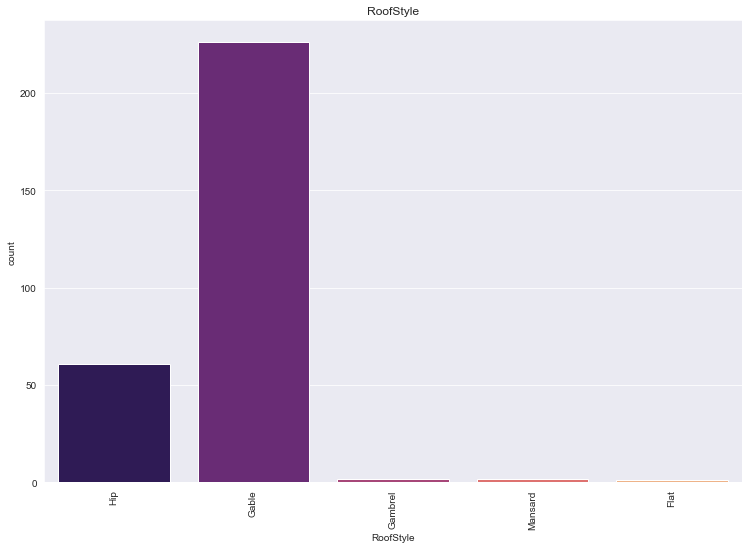

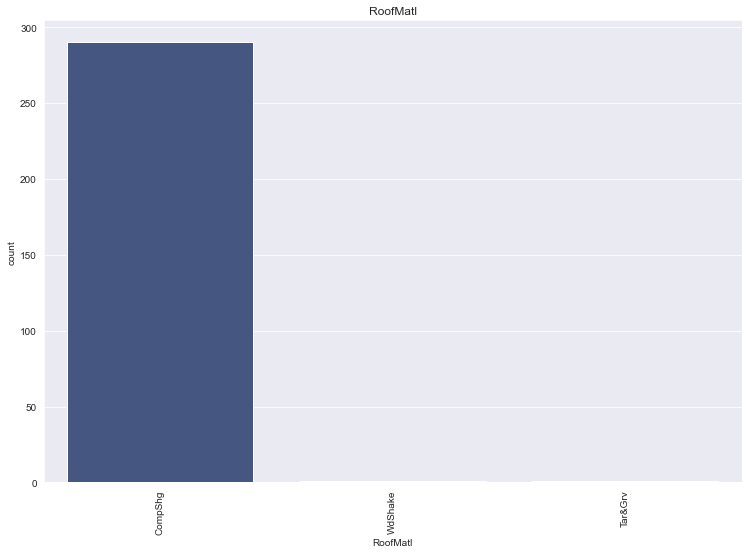

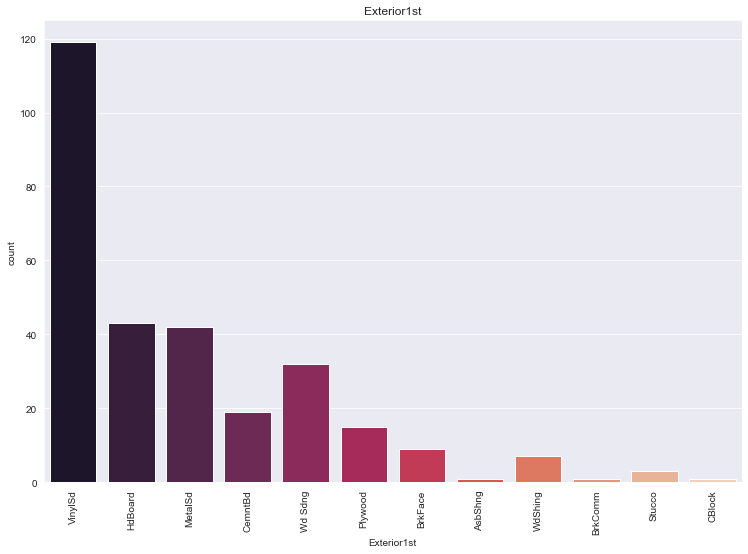

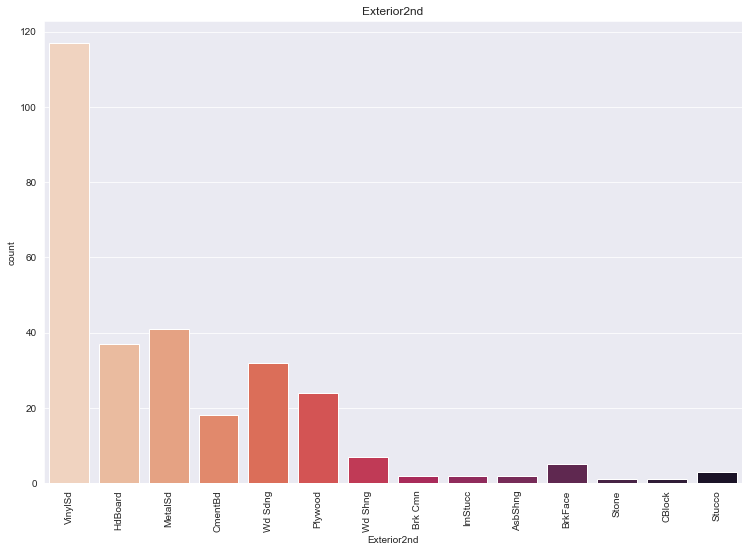

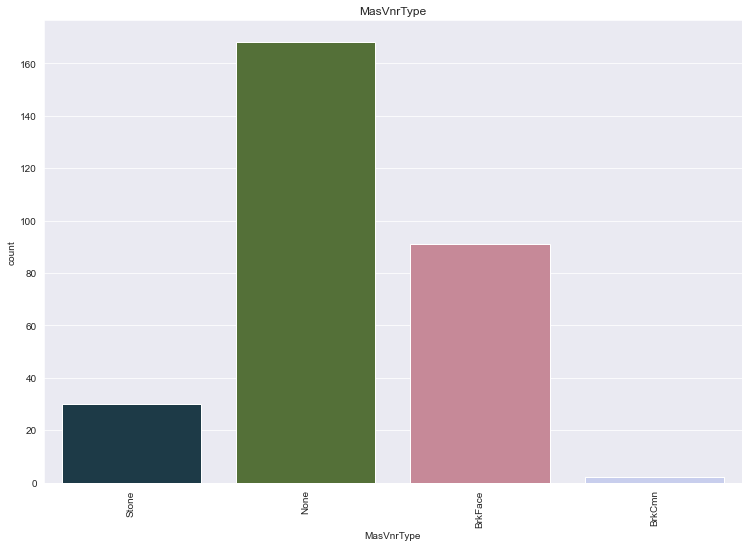

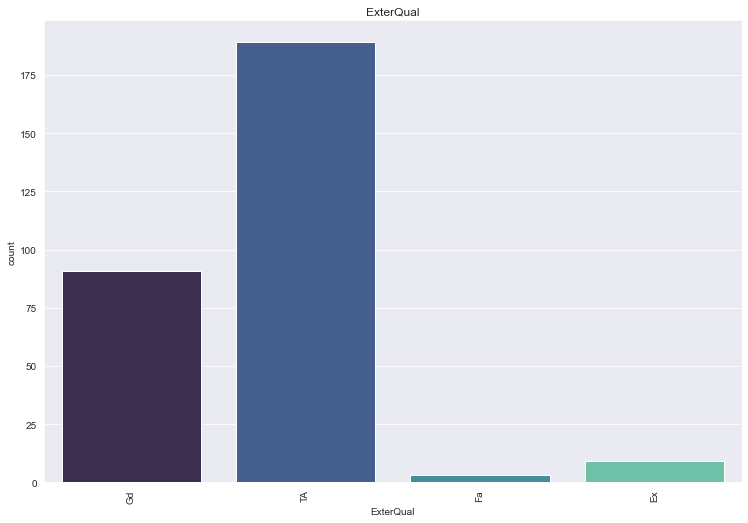

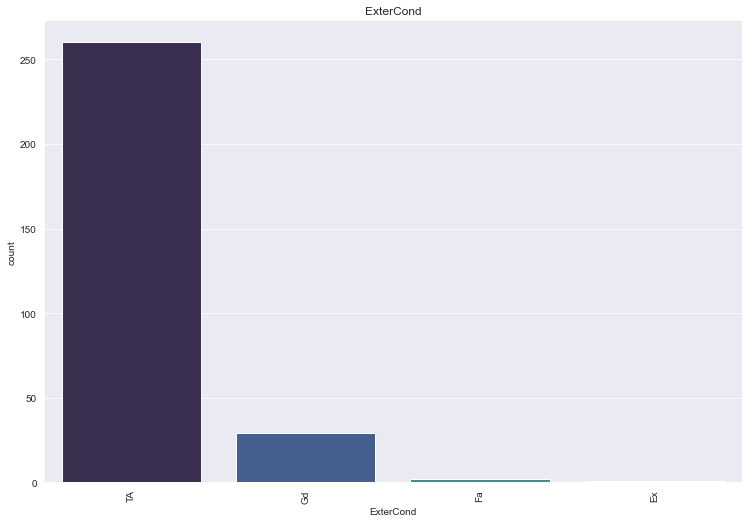

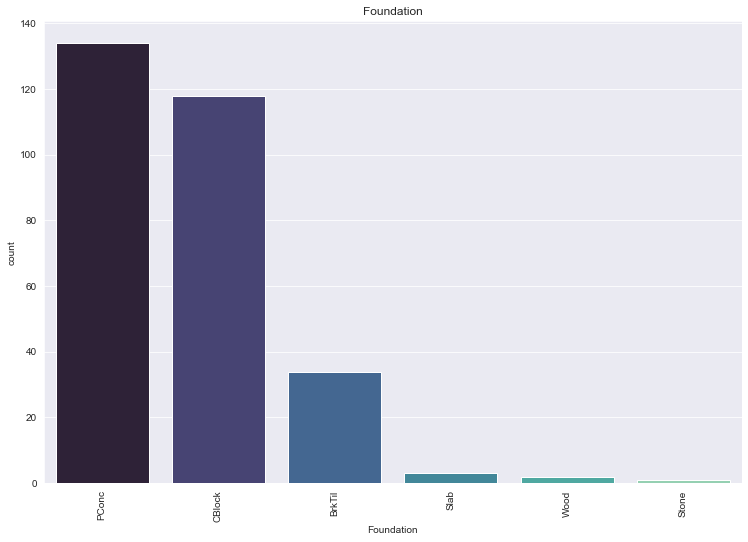

In [25]:
# RoofStyle -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='RoofStyle', 
    data = house,
    palette = 'magma'
).set_title('RoofStyle')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#RoofMatl -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='RoofMatl',
    data = house,
    palette = 'viridis'
).set_title('RoofMatl')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)


# Exterior1st -plot a bar chart
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Exterior1st', 
    data = house,
    palette = 'rocket'
).set_title('Exterior1st')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Exterior2nd -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Exterior2nd', 
    data = house,
    palette = 'rocket_r'
).set_title('Exterior2nd')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#MasVnrType -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='MasVnrType', 
    data = house,
    palette = 'cubehelix'
).set_title('MasVnrType')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#ExterQual -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='ExterQual', 
    data = house,
    palette = 'mako'
).set_title('ExterQual')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#ExterCond -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='ExterCond', 
    data = house,
    palette = 'mako'
).set_title('ExterCond')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#Foundation -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Foundation', 
    data = house,
    palette = 'mako'
).set_title('Foundation')
plt.xticks(rotation = 90)
plt.show()

## Observations:
- most of the columns have 1168 records  
- Columns :
     - Roofstyle : 6 unique values where, "Gable" as the topmost frequceny count of 915
     - RoofMatl  : 8 unique values where, "CompShg" as the topmost frequency count of 1144
     - Exterior1st: 14 uniqe values where, "VinylSd" as the topmost frequency count of 396
     - Exterior2nd: 15 unique values where, "VinylSd" as the topmost frequency count of 387
     - MasVnrType: 1161 records, 4 unique values where, "none" as the topmost frequency of 696
     - ExterQual: 4 unique values where, "TA" as the topmost frequency of 717
     - ExterCond: 5 unique values where, "TA" as the topmost frequency of 1022
     - Foundation: 6 unique values where, 'CBlock' as the topmost frequency of 516.
###  The MasVnrType has 696 "none" value and the calculated percentage is 60% of null value. Therefor the MarVnrType column can be dropped.
### The RoofMatl has 1144 "CompShg" value and the calculated percentage is 97.9%. Therefore the RoofMatl column can be dropped. By dropping these columns; the model will perform effectively.


In [26]:
next_10_2.describe()

YearRemodAdd   MasVnrArea
count    292.000000   291.000000
mean    1985.294521   109.171821
std       20.105792   175.030021
min     1950.000000     0.000000
25%     1968.000000     0.000000
50%     1994.000000     0.000000
75%     2003.250000   180.000000
max     2010.000000  1031.000000

In [27]:
# Find skewness
print("MasVnrArea : " +find_left_right(102.310078,0.000000,182.595606))

MasVnrArea : 1.6809289156717169 is not skewed


#### bivariate analysis

In [28]:
"""fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#OverallQual -> reg plot
sns.regplot(x="MasVnrArea",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("MasVnrArea")
time.sleep(1)
# YearRemodAdd - > time-series plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#create time series plot
sns.lineplot(x = 'YearRemodAdd',
              y= 'SalePrice',
              linestyle = 'solid',
             data = house,
             color = 'g'
             )
plt.xticks(rotation = 90)
plt.show()"""


'fig, ax = plt.subplots()\nfig.set_size_inches(12.5, 8.5)\n#OverallQual -> reg plot\nsns.regplot(x="MasVnrArea",\n            y="SalePrice",\n           data = house,\n           color = \'y\',\n            ci= None\n            ).set_title("MasVnrArea")\ntime.sleep(1)\n# YearRemodAdd - > time-series plot\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 8.5)\n#create time series plot\nsns.lineplot(x = \'YearRemodAdd\',\n              y= \'SalePrice\',\n              linestyle = \'solid\',\n             data = house,\n             color = \'g\'\n             )\nplt.xticks(rotation = 90)\nplt.show()'

## ----------------------------------------------- Third summary stat ----------------------------------------------

In [29]:
#exploring the next set of columns
next_10_3 = house.iloc[:, 30:41]

In [30]:
#categorical ecords 
next_10_3.describe(include = 'object')

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
count       285      285          285          285          285     292   
unique        4        3            4            6            6       4   
top          TA       TA           No          GLQ          Unf    GasA   
freq        132      270          197           88          254     285   

       HeatingQC  
count        292  
unique         4  
top           Ex  
freq         156

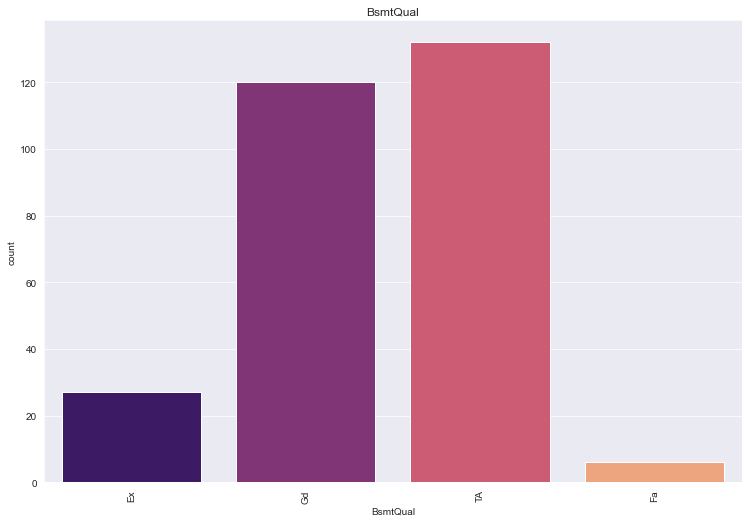

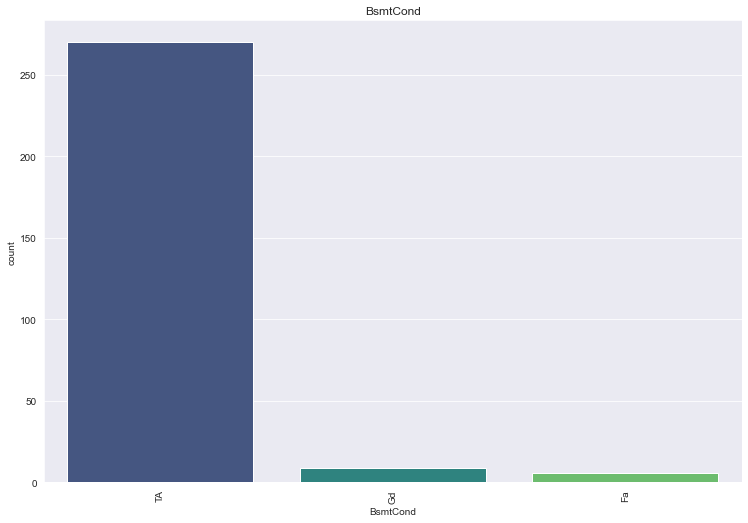

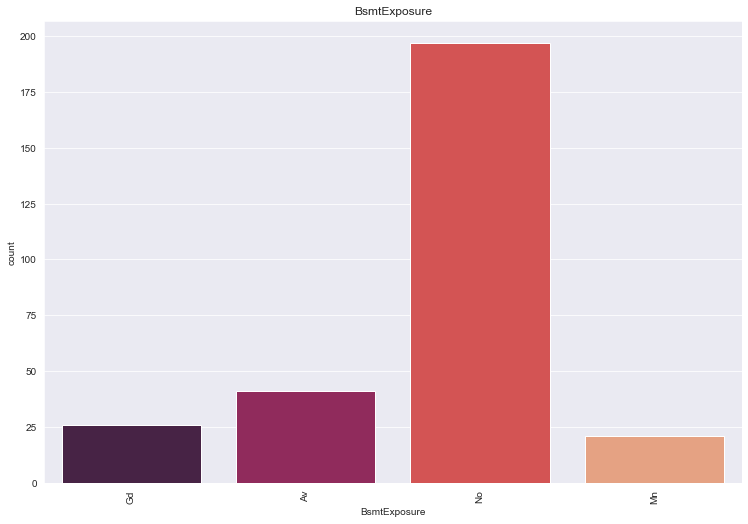

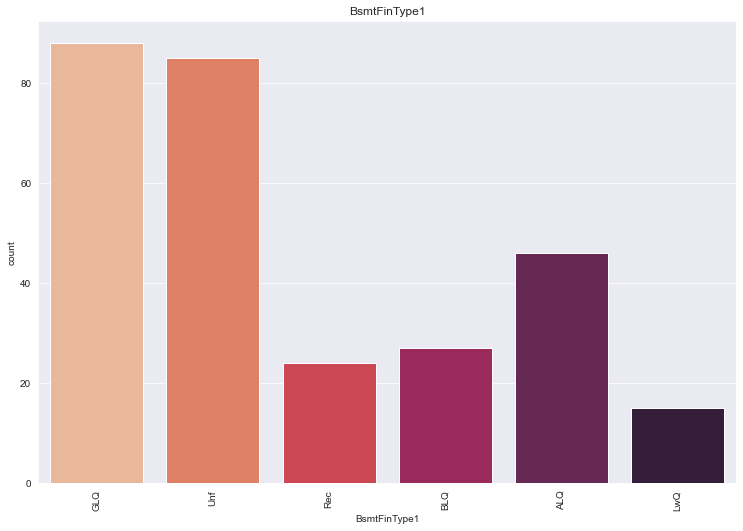

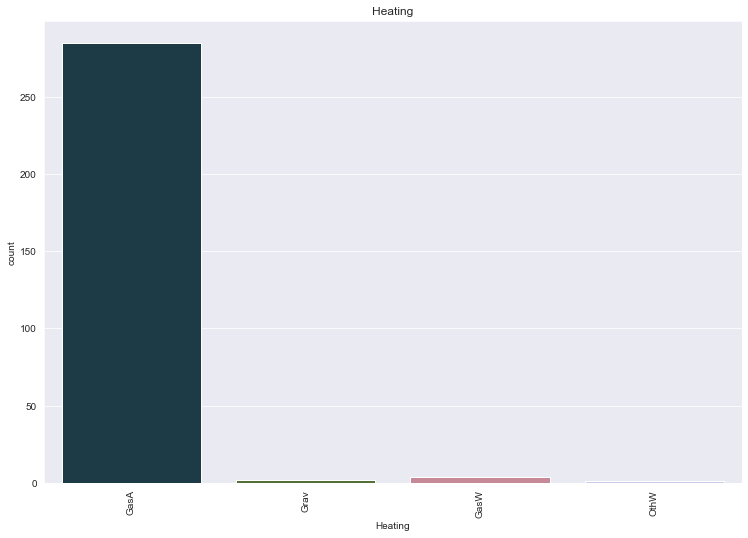

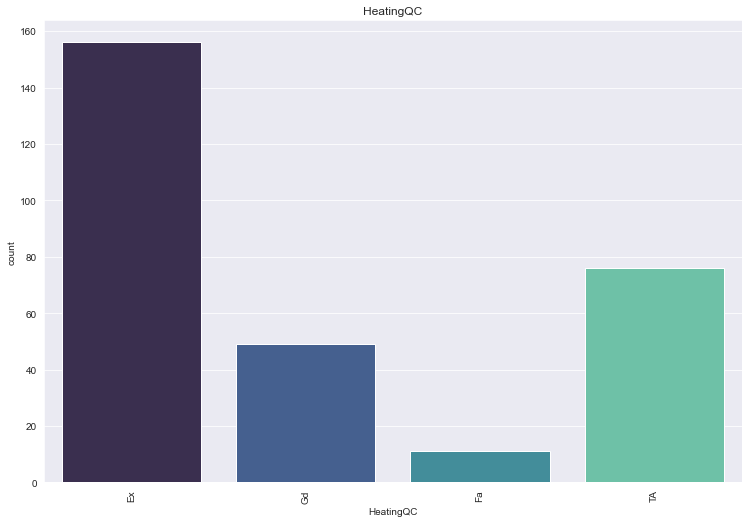

In [31]:
# BsmtQual -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='BsmtQual', 
    data = house,
    palette = 'magma'
).set_title('BsmtQual')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#BsmtCond -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='BsmtCond',
    data = house,
    palette = 'viridis'
).set_title('BsmtCond')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)


# BsmtExposure -plot a bar chart
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='BsmtExposure', 
    data = house,
    palette = 'rocket'
).set_title('BsmtExposure')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# BsmtFinType1 -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='BsmtFinType1', 
    data = house,
    palette = 'rocket_r'
).set_title('BsmtFinType1')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#Heating -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Heating', 
    data = house,
    palette = 'cubehelix'
).set_title('Heating')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

#HeatingQC -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='HeatingQC', 
    data = house,
    palette = 'mako'
).set_title('HeatingQC')
plt.xticks(rotation = 90)
plt.show()



###### Observations
- The BsmtQual have 1138 records with 4 uniques values and 'TA' is the topmost value with a frequency of 517
- The BsmtCond have 1138 records with 4 uniques values and 'TA' is the topmost value with a frequency of 1041
- The BsmtExposure have 1137 records with 4 uniques values and 'No' is the topmost value with a frequency of 756
- The BsmtFinType1 have 1138 records with 6 uniques values and 'Unf' is the topmost value with a frequency of 345
- The BsmtFinType2 have 1137 records with 6 uniques values and 'Unf' is the topmost value with a frequency of 1002
- The heating have 1168 records with 6 uniques values and 'GasA' is the topmost value with a frequency of 1002
- The HeatingQC have have 1168 records with 5 uniques values and 'Ex' is the topmost value with a frequency of 585

##### Overall, the null values in the dataset are insignificant and they can be handled using null value replacement methods


### numerical analysis

In [32]:
# numerical descriptive analytics 
next_10_3.describe()

BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF
count   292.000000   292.000000   292.000000   292.000000
mean    439.294521    46.157534   557.315068  1042.767123
std     429.559675   152.467119   411.043768   424.561153
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000   255.000000   771.750000
50%     369.500000     0.000000   487.000000   971.000000
75%     700.500000     0.000000   780.000000  1322.000000
max    1767.000000  1085.000000  1935.000000  3094.000000

In [33]:
# finding the skewness
print("Skewness Analysis")
print("BsmtFinSF1 : " +find_left_right(444.726027,385.500000,462.664785))
print("BsmtFinSF2 : " +find_left_right(46.647260,0.000000,163.520016))
print("BsmtUnfSF : " + find_left_right(569.721747,474.000000,449.375525))
print("TotalBsmtSF : " +find_left_right(1061.095034,1005.500000,442.272249))

Skewness Analysis
BsmtFinSF1 : 0.3840319962972759 is not skewed
BsmtFinSF2 : 0.8558082577487027 is not skewed
BsmtUnfSF : 0.6390317785998696 is not skewed
TotalBsmtSF : 0.37710957985066756 is not skewed


## Bivariate analysis

In [34]:
"""fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#BsmtFinSF1 -> reg plot
sns.regplot(x="BsmtFinSF1",
            y="SalePrice",
           data = house,
           color = 'b',
            ci= None
            ).set_title("BsmtFinSF1")
time.sleep(1)

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#BsmtFinSF2 -> reg plot
sns.regplot(x="BsmtFinSF2",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("BsmtFinSF2")
time.sleep(1)


#TotalBsmtSF -> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
sns.regplot(x="TotalBsmtSF",
            y="SalePrice",
           data = house,
           color = 'r',
            ci= None
            ).set_title("TotalBsmtSF")
time.sleep(1)


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#BsmtUnfSF -> reg plot
sns.regplot(x="BsmtUnfSF",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("BsmtUnfSF")

"""

'fig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#BsmtFinSF1 -> reg plot\nsns.regplot(x="BsmtFinSF1",\n            y="SalePrice",\n           data = house,\n           color = \'b\',\n            ci= None\n            ).set_title("BsmtFinSF1")\ntime.sleep(1)\n\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#BsmtFinSF2 -> reg plot\nsns.regplot(x="BsmtFinSF2",\n            y="SalePrice",\n           data = house,\n           color = \'g\',\n            ci= None\n            ).set_title("BsmtFinSF2")\ntime.sleep(1)\n\n\n#TotalBsmtSF -> reg plot\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\nsns.regplot(x="TotalBsmtSF",\n            y="SalePrice",\n           data = house,\n           color = \'r\',\n            ci= None\n            ).set_title("TotalBsmtSF")\ntime.sleep(1)\n\n\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#BsmtUnfSF -> reg plot\nsns.regplot(x="BsmtUnfSF",\n            y="SalePrice",\n           data = house,\n           

### Observations

- Overall, the columns have limited skewness, if needed it can be removed using z-score or IQR method


## ----------------------------------------------- Third summary stat ----------------------------------------------

In [35]:
# analysing the next set of records 
next_10_4 = house.iloc[:, 41:50]

### categorical values

In [36]:
next_10_4.describe(include='object')

CentralAir Electrical
count         292        291
unique          2          4
top             Y      SBrkr
freq          275        264

### Univariate analysis

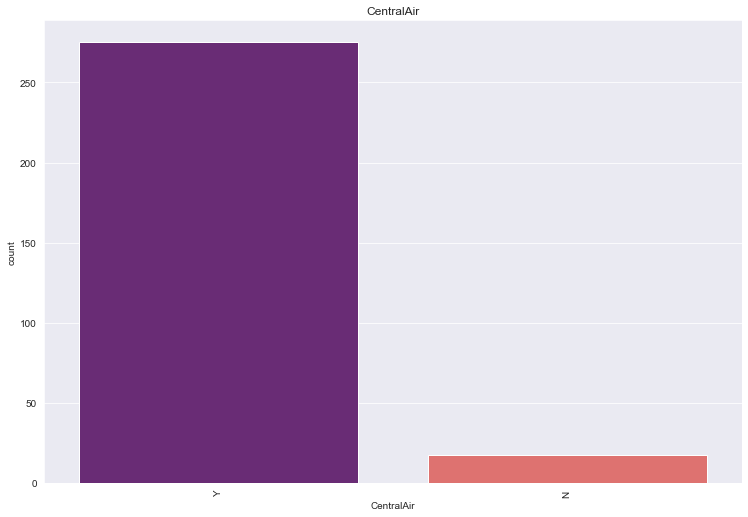

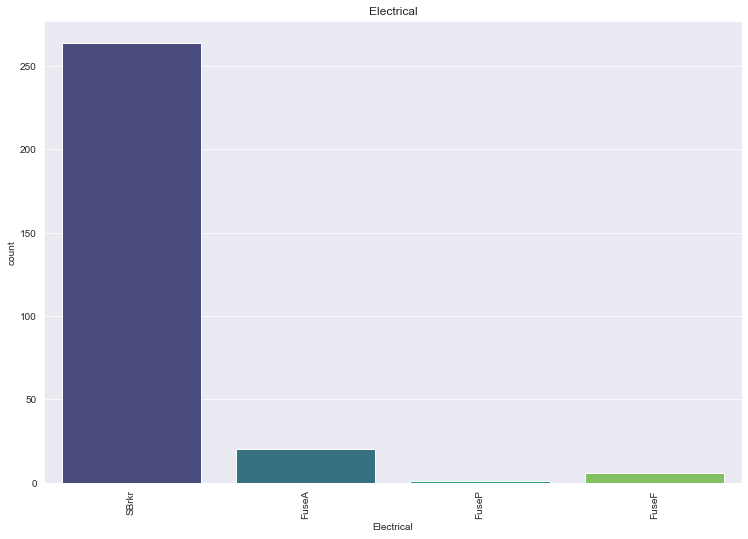

In [37]:
# CentralAir -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='CentralAir', 
    data = house,
    palette = 'magma'
).set_title('CentralAir')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Electrical-plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Electrical',
    data = house,
    palette = 'viridis'
).set_title('Electrical')
plt.xticks(rotation = 90)
plt.show()

## Observations

1. The centralair column has 1168 records and 2 uniques values and y type is the topmost value with 1090 count(yes)
2. The Electrical column has 1168 records and 5 unique values, SBrkr type is the topmost value with 1070

### numerical values

In [38]:
 records = next_10_4.describe()

In [39]:
records

1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count   292.000000   292.000000    292.000000   292.000000    292.000000   
mean   1133.691781   339.657534      3.702055  1477.051370      0.424658   
std     366.941919   424.278825     38.219527   514.199429      0.508831   
min     372.000000     0.000000      0.000000   520.000000      0.000000   
25%     858.000000     0.000000      0.000000  1061.500000      0.000000   
50%    1047.500000     0.000000      0.000000  1440.000000      0.000000   
75%    1370.500000   717.000000      0.000000  1720.250000      1.000000   
max    2402.000000  1589.000000    479.000000  3447.000000      2.000000   

       BsmtHalfBath    FullBath  
count    292.000000  292.000000  
mean       0.065068    1.575342  
std        0.247070    0.547856  
min        0.000000    0.000000  
25%        0.000000    1.000000  
50%        0.000000    2.000000  
75%        0.000000    2.000000  
max        1.000000    3.000000

In [40]:
records.columns

Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath'],
      dtype='object')

In [41]:
mean_list = []

for x in records.items():
    mean_list.append(x[1][1])

median_list = [x[1][5] for x in records.items()]
median_list
std_list =  [x[1][2] for x in records.items()]

In [42]:
std_list

[366.9419191485662,
 424.27882517211685,
 38.21952680816809,
 514.199428563361,
 0.5088308334034778,
 0.2470701072656319,
 0.5478557569508051]

In [43]:
nested_mean_median_std = []
nested_mean_median_std.append(mean_list)
nested_mean_median_std.append(median_list)
nested_mean_median_std.append(std_list)

nested_mean_median_std

[[1133.6917808219177,
  339.6575342465753,
  3.702054794520548,
  1477.0513698630136,
  0.4246575342465753,
  0.06506849315068493,
  1.5753424657534247],
 [1047.5, 0.0, 0.0, 1440.0, 0.0, 0.0, 2.0],
 [366.9419191485662,
  424.27882517211685,
  38.21952680816809,
  514.199428563361,
  0.5088308334034778,
  0.2470701072656319,
  0.5478557569508051]]

In [44]:
rep_list = []
for x in nested_mean_median_std:
    rep_list.append(x[0])
rep_list

[1133.6917808219177, 1047.5, 366.9419191485662]

In [45]:
   
find_left_right(rep_list[0], rep_list[1], rep_list[2])

'0.7046764868558452 is not skewed'

In [46]:

def automate_skew_ref(h, a):
    rep_list = []
    for x in h:
        rep_list.append(x[a])
        
    values = find_left_right(rep_list[0], rep_list[1], rep_list[2])
    return values

    
    

In [47]:
print(automate_skew_ref(nested_mean_median_std, 0))
print(automate_skew_ref(nested_mean_median_std, 1))
print(automate_skew_ref(nested_mean_median_std, 2))
print(automate_skew_ref(nested_mean_median_std, 3))
print(automate_skew_ref(nested_mean_median_std, 4))
print(automate_skew_ref(nested_mean_median_std, 5))
print(automate_skew_ref(nested_mean_median_std, 6))
    

0.7046764868558452 is not skewed
2.401657924659238 is not skewed
0.29058874640980875 is not skewed
0.21616925926891456 is not skewed
2.503725244436059 is not skewed
0.790081332025262 is not skewed
-2.3253796032559033 is not skewed


## Bivariate analysis

In [48]:
"""fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#1stFlrSF -> reg plot
sns.regplot(x="1stFlrSF",
            y="SalePrice",
           data = house,
           color = 'b',
            ci= None
            ).set_title("1stFlrSF")
time.sleep(1)

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#2ndFlrSF -> reg plot
sns.regplot(x="2ndFlrSF",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("2ndFlrSF")
time.sleep(1)


#LowQualFinSF -> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
sns.regplot(x="LowQualFinSF",
            y="SalePrice",
           data = house,
           color = 'r',
            ci= None
            ).set_title("LowQualFinSF")
time.sleep(1)


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#GrLivArea -> reg plot
sns.regplot(x="GrLivArea",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("GrLivArea")


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#BsmtFullBath -> reg plot
sns.regplot(x="BsmtFullBath",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("BsmtFullBath")

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#BsmtHalfBath -> reg plot
sns.regplot(x="BsmtHalfBath",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("BsmtHalfBath")

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#FullBath -> reg plot
sns.regplot(x="FullBath",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("FullBath")
"""

'fig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#1stFlrSF -> reg plot\nsns.regplot(x="1stFlrSF",\n            y="SalePrice",\n           data = house,\n           color = \'b\',\n            ci= None\n            ).set_title("1stFlrSF")\ntime.sleep(1)\n\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#2ndFlrSF -> reg plot\nsns.regplot(x="2ndFlrSF",\n            y="SalePrice",\n           data = house,\n           color = \'g\',\n            ci= None\n            ).set_title("2ndFlrSF")\ntime.sleep(1)\n\n\n#LowQualFinSF -> reg plot\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\nsns.regplot(x="LowQualFinSF",\n            y="SalePrice",\n           data = house,\n           color = \'r\',\n            ci= None\n            ).set_title("LowQualFinSF")\ntime.sleep(1)\n\n\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#GrLivArea -> reg plot\nsns.regplot(x="GrLivArea",\n            y="SalePrice",\n           data = house,\n           color = \

## observations

- Some columns are skewed and rest are symmetric. If Skewness should be removed z-score or IQR method will be used.
- Most of the numerical comlumn show a trend. Except for BSMTHALF BATH, LOWQUALFINSF.

## ----------------------------------------------- Fourth summary stat ----------------------------------------------

In [49]:
# analysing the next set of records
next_10_5 = house.iloc[:, 51:60]
#categorical variables 
next_10_5.describe(include= 'object')

KitchenQual Functional FireplaceQu GarageType
count          292        292         153        275
unique           4          6           5          6
top             TA        Typ          Gd     Attchd
freq           157        275          79        179

### Univariate analysis

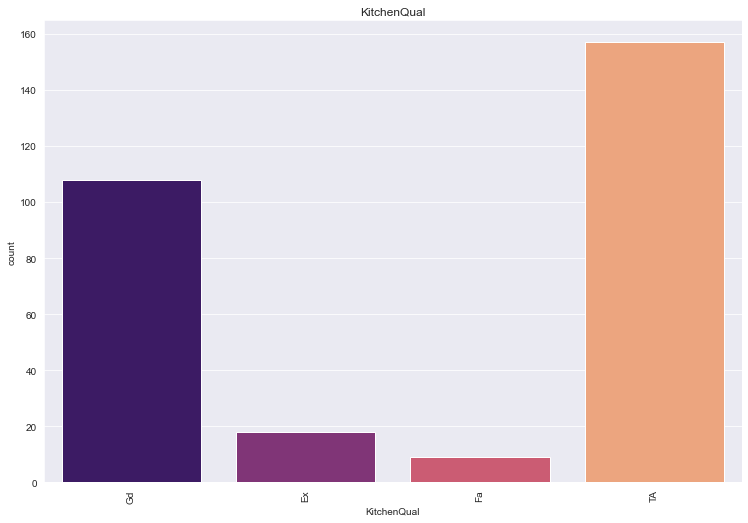

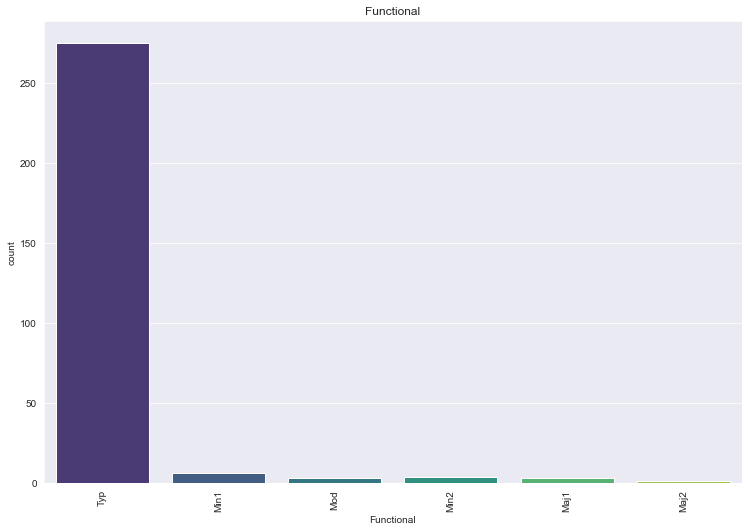

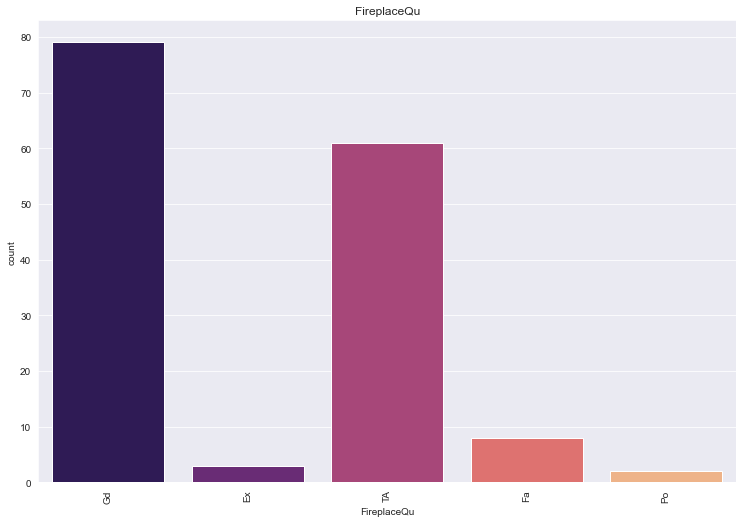

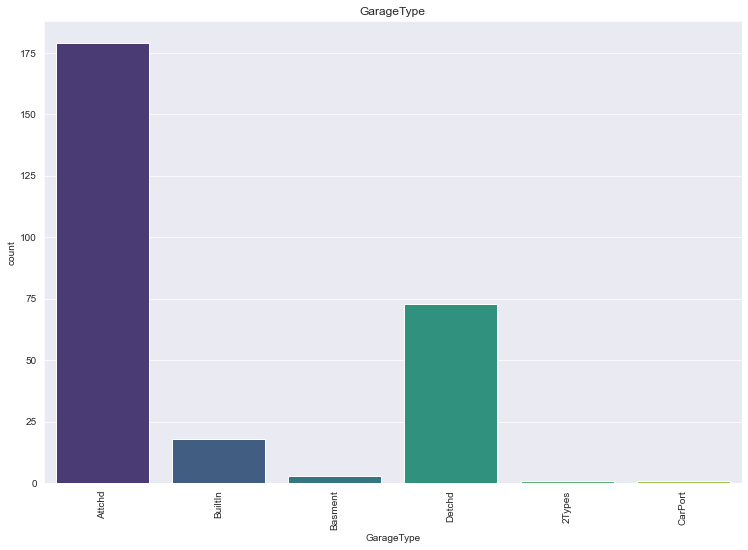

In [50]:
# KitchenQual -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='KitchenQual', 
    data = house,
    palette = 'magma'
).set_title('KitchenQual')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# Functional-plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='Functional',
    data = house,
    palette = 'viridis'
).set_title('Functional')
plt.xticks(rotation = 90)
plt.show()

# FireplaceQu -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='FireplaceQu', 
    data = house,
    palette = 'magma'
).set_title('FireplaceQu')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# GarageType-plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='GarageType',
    data = house,
    palette = 'viridis'
).set_title('GarageType')
plt.xticks(rotation = 90)
plt.show()

## Observations:

- There are 2 columns with 1168 records 
    - The kitchenqual have 4 unique values and TA is the topmost value with a freq of 578
    - the funtional column have 7 unique values and Typ is the topmost value with a freq of 1085
- The frieplacequ have 617 records and 5 unique values and Gd is the topmost value with a freq of 301
- The Garage type have 1104 records with 6 unique values and Attchd is the topmost value with a freq of 691

### Nurmerical

In [51]:
#numerical summart statistics
next_10_5.describe()

BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt
count    292.000000     292.00000    292.000000  292.000000   275.000000
mean       2.794521       1.05137      6.417808    0.595890  1979.760000
std        0.807336       0.23616      1.728105    0.621259    23.868875
min        0.000000       1.00000      3.000000    0.000000  1916.000000
25%        2.000000       1.00000      5.000000    0.000000  1964.000000
50%        3.000000       1.00000      6.000000    1.000000  1979.000000
75%        3.000000       1.00000      7.000000    1.000000  2003.000000
max        6.000000       3.00000     12.000000    2.000000  2010.000000

### Finding skewness

In [52]:
rec = next_10_5.describe()
mean_list = [x[1][1] for x in rec.items()]
median_list = [x[1][5] for x in rec.items()]
std_list =  [x[1][2] for x in rec.items()]

In [53]:
nested_mean_median_std = []
nested_mean_median_std.append(mean_list)
nested_mean_median_std.append(median_list)
nested_mean_median_std.append(std_list)

In [54]:
print("BedroomAbvGr : "+automate_skew_ref(nested_mean_median_std, 0))
print("KitchenAbvGr : "+automate_skew_ref(nested_mean_median_std, 1))
print("TotRmsAbvGrd : "+automate_skew_ref(nested_mean_median_std, 2))
print("Fireplaces : "+automate_skew_ref(nested_mean_median_std, 3))



BedroomAbvGr : -0.7635463660801256 is not skewed
KitchenAbvGr : 0.6525656780980105 is not skewed
TotRmsAbvGrd : 0.7253172299065841 is not skewed
Fireplaces : -1.9514071500122336 is not skewed


In [55]:
"""fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#BedroomAbvGr -> reg plot
sns.regplot(x="BedroomAbvGr",
            y="SalePrice",
           data = house,
           color = 'b',
            ci= None
            ).set_title("BedroomAbvGr")
time.sleep(1)

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#KitchenAbvGr  -> reg plot
sns.regplot(x="KitchenAbvGr",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("KitchenAbvGr")
time.sleep(1)


#TotRmsAbvGrd-> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
sns.regplot(x="TotRmsAbvGrd",
            y="SalePrice",
           data = house,
           color = 'r',
            ci= None
            ).set_title("TotRmsAbvGrd")
time.sleep(1)


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#Fireplaces -> reg plot
sns.regplot(x="Fireplaces",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("Fireplaces")


# GarageYrBlt - > time-series plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
#create time series plot
sns.lineplot(x = 'GarageYrBlt',
              y= 'SalePrice',
              linestyle = 'solid',
             data = house,
             color = 'g'
             ).set_title("GarageYrBlt")
plt.xticks(rotation = 90)
plt.show()

"""

'fig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#BedroomAbvGr -> reg plot\nsns.regplot(x="BedroomAbvGr",\n            y="SalePrice",\n           data = house,\n           color = \'b\',\n            ci= None\n            ).set_title("BedroomAbvGr")\ntime.sleep(1)\n\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#KitchenAbvGr  -> reg plot\nsns.regplot(x="KitchenAbvGr",\n            y="SalePrice",\n           data = house,\n           color = \'g\',\n            ci= None\n            ).set_title("KitchenAbvGr")\ntime.sleep(1)\n\n\n#TotRmsAbvGrd-> reg plot\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\nsns.regplot(x="TotRmsAbvGrd",\n            y="SalePrice",\n           data = house,\n           color = \'r\',\n            ci= None\n            ).set_title("TotRmsAbvGrd")\ntime.sleep(1)\n\n\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#Fireplaces -> reg plot\nsns.regplot(x="Fireplaces",\n            y="SalePrice",\n           data = ho

## ----------------------------------------------- Sixth summary stat ----------------------------------------------

In [56]:
# analysing the next set of records
next_10_6 = house.iloc[:, 61:70]

#### categorical analysis

In [57]:
#categorical summary stat
next_10_6.describe(include ='object')

GarageQual GarageCond PavedDrive
count         275        275        292
unique          5          5          3
top            TA         TA          Y
freq          261        265        269

### Univariate analysis

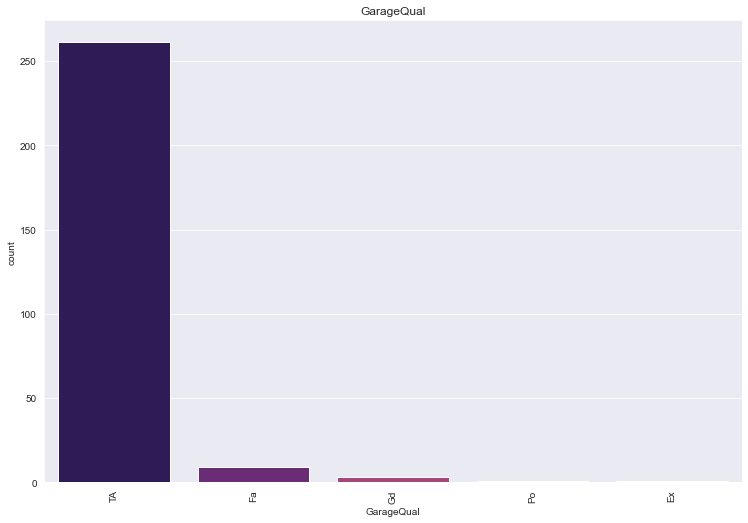

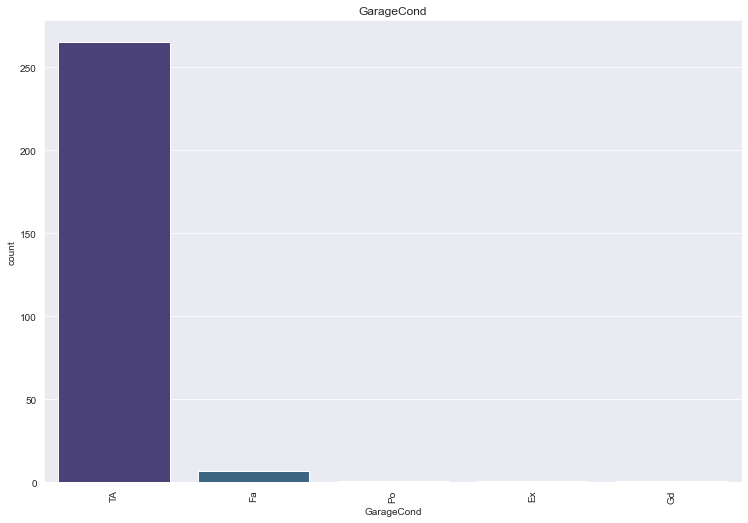

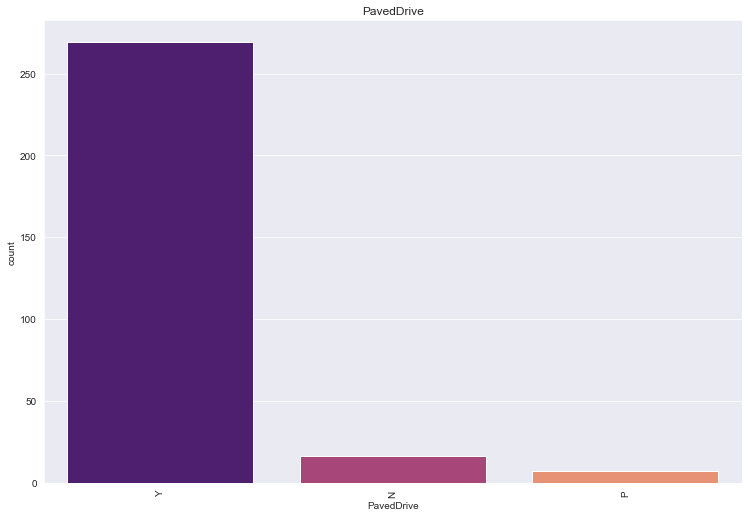

In [58]:
# GarageQual -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='GarageQual', 
    data = house,
    palette = 'magma'
).set_title('GarageQual')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# GarageCond-plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='GarageCond',
    data = house,
    palette = 'viridis'
).set_title('GarageCond')
plt.xticks(rotation = 90)
plt.show()

# PavedDrive -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='PavedDrive', 
    data = house,
    palette = 'magma'
).set_title('PavedDrive')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

### Observartion:

- There are 2 columns with 1104 values 
   - GarageQual have 5 unique values and  TA as the topmost value with a freq of 1050
   - GarageCond have 5 unique values and TA as the topmost value with a freq of  1061
   - PavedDrive have 3 unique values and Y(yes) as the topmost value with a freq of 1071
  
    

In [59]:
# numerical variable analysis
next_10_6.describe()

GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  292.000000   292.000000  292.000000   292.000000     292.000000   
mean     1.729452   457.458904   86.397260    47.061644      17.708904   
std      0.754430   210.785591  121.898836    65.865449      51.892906   
min      0.000000     0.000000    0.000000     0.000000       0.000000   
25%      1.000000   300.000000    0.000000     0.000000       0.000000   
50%      2.000000   467.500000    0.000000    28.500000       0.000000   
75%      2.000000   569.750000  149.250000    66.000000       0.000000   
max      4.000000  1052.000000  728.000000   418.000000     330.000000   

        3SsnPorch  
count  292.000000  
mean     2.489726  
std     30.247488  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max    407.000000

In [60]:
rec = next_10_6.describe()
mean_list = [x[1][1] for x in rec.items()]
median_list = [x[1][5] for x in rec.items()]
std_list =  [x[1][2] for x in rec.items()]

In [61]:
nested_mean_median_std = []
nested_mean_median_std.append(mean_list)
nested_mean_median_std.append(median_list)
nested_mean_median_std.append(std_list)

In [62]:
next_10_6.columns

Index(['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'],
      dtype='object')

In [63]:
print("GarageCars : "+automate_skew_ref(nested_mean_median_std, 0))
print("GarageArea : "+automate_skew_ref(nested_mean_median_std, 1))


print("WoodDeckSF : "+automate_skew_ref(nested_mean_median_std, 2))
print("OpenPorchSF : "+automate_skew_ref(nested_mean_median_std, 3))
print("EnclosedPorch : "+automate_skew_ref(nested_mean_median_std, 4))
print("3SsnPorch : "+automate_skew_ref(nested_mean_median_std, 5))



GarageCars : -1.07583779777566 is not skewed
GarageArea : -0.1429096151584392 is not skewed
WoodDeckSF : 2.12628594067808 is not skewed
OpenPorchSF : 0.8454346316447992 is not skewed
EnclosedPorch : 1.0237760035428933 is not skewed
3SsnPorch : 0.24693548151998548 is not skewed


## Bivariate analysis

In [64]:
"""fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#GarageCars -> reg plot
sns.regplot(x="GarageCars",
            y="SalePrice",
           data = house,
           color = 'b',
            ci= None
            ).set_title("GarageCars")
time.sleep(1)

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#GarageArea  -> reg plot
sns.regplot(x="GarageArea",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("GarageArea")
time.sleep(1)


#WoodDeckSF-> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
sns.regplot(x="WoodDeckSF",
            y="SalePrice",
           data = house,
           color = 'r',
            ci= None
            ).set_title("WoodDeckSF")
time.sleep(1)


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#OpenPorchSF -> reg plot
sns.regplot(x="OpenPorchSF",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("OpenPorchSF")

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#EnclosedPorch -> reg plot
sns.regplot(x="EnclosedPorch",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("EnclosedPorch")

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#3SsnPorch -> reg plot
sns.regplot(x="3SsnPorch",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("3SsnPorch")
"""

'fig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#GarageCars -> reg plot\nsns.regplot(x="GarageCars",\n            y="SalePrice",\n           data = house,\n           color = \'b\',\n            ci= None\n            ).set_title("GarageCars")\ntime.sleep(1)\n\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#GarageArea  -> reg plot\nsns.regplot(x="GarageArea",\n            y="SalePrice",\n           data = house,\n           color = \'g\',\n            ci= None\n            ).set_title("GarageArea")\ntime.sleep(1)\n\n\n#WoodDeckSF-> reg plot\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\nsns.regplot(x="WoodDeckSF",\n            y="SalePrice",\n           data = house,\n           color = \'r\',\n            ci= None\n            ).set_title("WoodDeckSF")\ntime.sleep(1)\n\n\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#OpenPorchSF -> reg plot\nsns.regplot(x="OpenPorchSF",\n            y="SalePrice",\n           data = house,\n          

## ----------------------------------------------- Seven summary stat ----------------------------------------------

In [65]:
# analysing the last few records
next_10_7 = house.iloc[:, 70:]

In [66]:
#categorical variables 
next_10_7.describe(include = 'object')

Fence MiscFeature SaleType SaleCondition
count      44          10      292           292
unique      4           2        6             4
top     MnPrv        Shed       WD        Normal
freq       28           9      268           253

### Univariate analysis

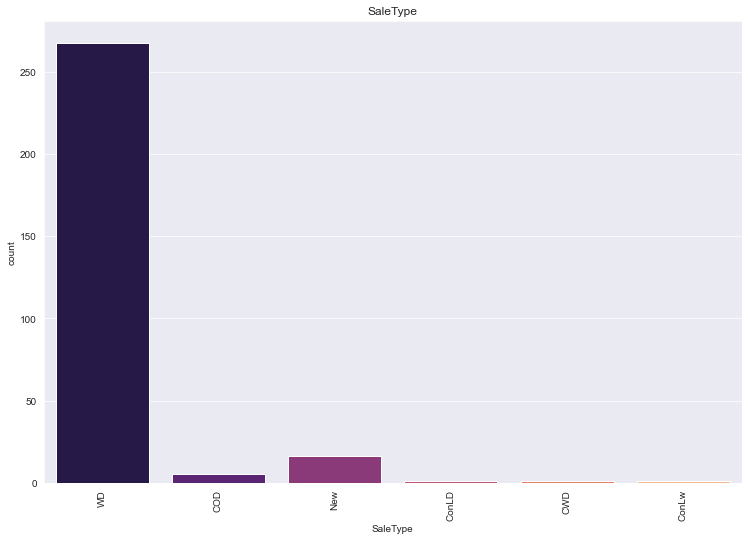

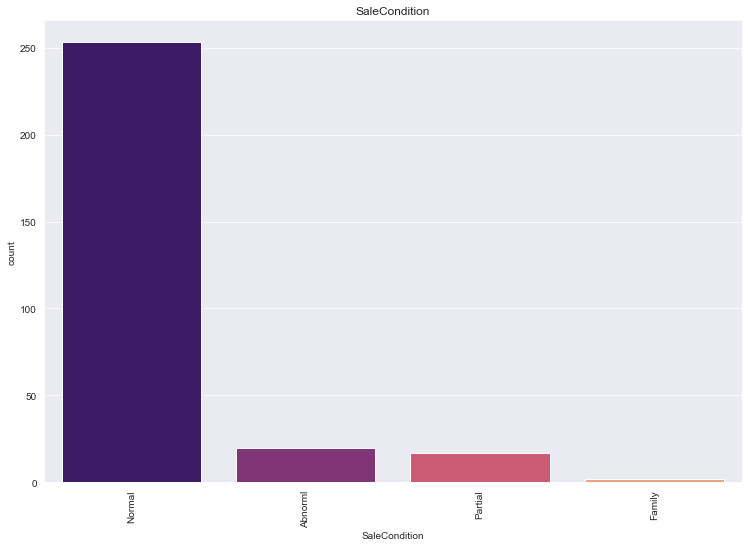

In [67]:
# SaleType -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='SaleType', 
    data = house,
    palette = 'magma'
).set_title('SaleType')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)

# SaleCondition -plot a bar chart 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sns.countplot(
    x='SaleCondition', 
    data = house,
    palette = 'magma'
).set_title('SaleCondition')
plt.xticks(rotation = 90)
plt.show()

time.sleep(1)


### Observations:

 -  The poolQC has 7 values
 -  The fence has 237 values
 -  Miscfeature has 44 values 
    - Due to inadequate data the above columns can be dropped
 - The sale type column has 1168 values with 9 unique values and WD is the topmost value with a frequency of 999
 - The salecondition has 1168 values with 6 unique values and Normal is the topmost value with a frequency of 945
    

### Numerical analysis

In [68]:
# numerical summary stat
next_10_7.describe()

ScreenPorch  PoolArea  PoolQC      MiscVal      MoSold       YrSold
count   292.000000     292.0     0.0   292.000000  292.000000   292.000000
mean     15.099315       0.0     NaN    28.184932    6.232877  2007.859589
std      58.483473       0.0     NaN   224.036218    2.774556     1.322867
min       0.000000       0.0     NaN     0.000000    1.000000  2006.000000
25%       0.000000       0.0     NaN     0.000000    4.000000  2007.000000
50%       0.000000       0.0     NaN     0.000000    6.000000  2008.000000
75%       0.000000       0.0     NaN     0.000000    8.000000  2009.000000
max     396.000000       0.0     NaN  3500.000000   12.000000  2010.000000

In [69]:
rec = next_10_7.describe()
mean_list = [x[1][1] for x in rec.items()]
median_list = [x[1][5] for x in rec.items()]
std_list =  [x[1][2] for x in rec.items()]
# creating a nested list
nested_mean_median_std = []
nested_mean_median_std.append(mean_list)
nested_mean_median_std.append(median_list)
nested_mean_median_std.append(std_list)

#fucntion to identify distribution/skewness

print("ScreenPorch : "+automate_skew_ref(nested_mean_median_std, 0))
print("PoolArea: "+automate_skew_ref(nested_mean_median_std, 1))
print("MiscVal : "+automate_skew_ref(nested_mean_median_std, 2))
print("MoSold : "+automate_skew_ref(nested_mean_median_std, 3))
print("YrSold : "+automate_skew_ref(nested_mean_median_std, 4))
print("SalePrice : "+automate_skew_ref(nested_mean_median_std, 5))



ScreenPorch : 0.7745426736789655 is not skewed
PoolArea: nan is skewed
MiscVal : nan is skewed
MoSold : 0.377415738313589 is not skewed
YrSold : 0.2517989219699665 is not skewed
SalePrice : -0.31842426590140754 is not skewed


In [70]:
"""fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#ScreenPorch -> reg plot
sns.regplot(x="ScreenPorch",
            y="SalePrice",
           data = house,
           color = 'b',
            ci= None
            ).set_title("ScreenPorch")
time.sleep(1)

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#PoolArea  -> reg plot
sns.regplot(x="PoolArea",
            y="SalePrice",
           data = house,
           color = 'g',
            ci= None
            ).set_title("PoolArea")
time.sleep(1)


#YrSold -> reg plot
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
sns.regplot(x="YrSold",
            y="SalePrice",
           data = house,
           color = 'r',
            ci= None
            ).set_title("YrSold")
time.sleep(1)


fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
#MoSold -> reg plot
sns.regplot(x="MoSold",
            y="SalePrice",
           data = house,
           color = 'y',
            ci= None
            ).set_title("MoSold")

"""

'fig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#ScreenPorch -> reg plot\nsns.regplot(x="ScreenPorch",\n            y="SalePrice",\n           data = house,\n           color = \'b\',\n            ci= None\n            ).set_title("ScreenPorch")\ntime.sleep(1)\n\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#PoolArea  -> reg plot\nsns.regplot(x="PoolArea",\n            y="SalePrice",\n           data = house,\n           color = \'g\',\n            ci= None\n            ).set_title("PoolArea")\ntime.sleep(1)\n\n\n#YrSold -> reg plot\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\nsns.regplot(x="YrSold",\n            y="SalePrice",\n           data = house,\n           color = \'r\',\n            ci= None\n            ).set_title("YrSold")\ntime.sleep(1)\n\n\nfig, ax = plt.subplots()\nfig.set_size_inches(12.5, 10.5)\n#MoSold -> reg plot\nsns.regplot(x="MoSold",\n            y="SalePrice",\n           data = house,\n           color = \'y\',\n       

### Observation:

- there are no skewed columns in the last set of records
- some columns have a positive trend with sales price.

# Overall obsservations:

   - Based on the graphs and summary statistics the housing dataset has few columns that either poorly related or has inadequeate data or many only be null values.
      - columns to be droped are:
         - id
         - Alley
         - utilities
         - MasVnrType
         - RoofMatl
         - poolQC
         - fence
         - Miscfeature
  --------------------------------------------------------------------------------------------------------------       
         
 ## reason : 
 ###### We can drop the column alley, since, it has more than 50% of the records as nan   
 ###### we can drop the column utilities, since, the column contians singular value. Therefore, the prediction might become one-sided affecting the predictive capabilities of the model.
 ###### The MasVnrType has 696 "none" value and the calculated percentage is 60% of null value. Therefor the MarVnrType column can be dropped.
 ###### The RoofMatl has 1144 "CompShg" value and the calculated percentage is 97.9%. Therefore the RoofMatl column can be dropped. By dropping these columns; the model will perform effectively.
 ######  The poolQC has 7 values,The fence has 237 values,Miscfeature has 44 values. Due to inadequate data the above columns can be dropped

In [71]:
to_be_droped = ['Id', 'Alley','Utilities','MasVnrType','RoofMatl','PoolQC','Fence','MiscFeature']

for x in to_be_droped:
    house = house.drop(x, axis=1)

In [72]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3Ssn

In [73]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   LotConfig      292 non-null    object 
 8   LandSlope      292 non-null    object 
 9   Neighborhood   292 non-null    object 
 10  Condition1     292 non-null    object 
 11  Condition2     292 non-null    object 
 12  BldgType       292 non-null    object 
 13  HouseStyle     292 non-null    object 
 14  OverallQual    292 non-null    int64  
 15  OverallCond    292 non-null    int64  
 16  YearBuilt      292 non-null    int64  
 17  YearRemodAdd   292 non-null    int64  
 18  RoofStyle 

### exploring the categorical variables using multivariate analysis

1. Finding the relationship between identifying the type of dwelling involved and zoning classification of the sale for two street types 

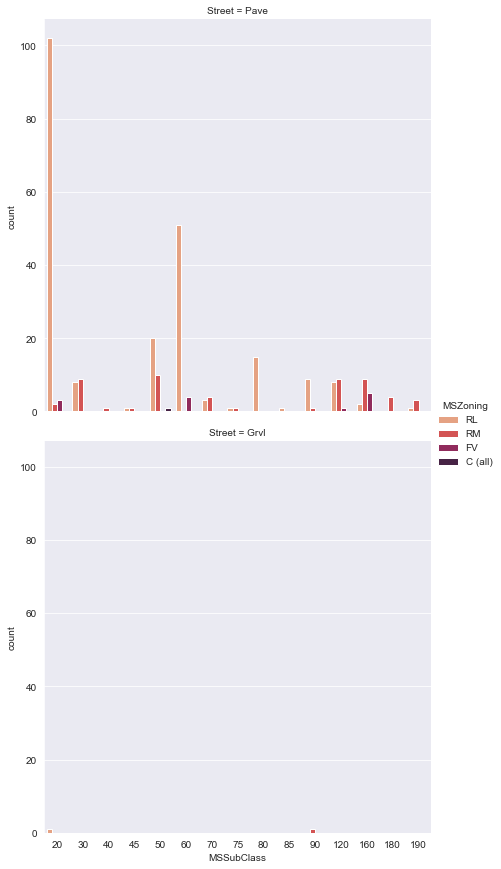

In [74]:
# catplot for analysis of categorical variables
sns.catplot(data = house,
           x="MSSubClass",
           hue = "MSZoning",
           col_wrap = 1,
           col = 'Street',
            palette = "rocket_r",
            kind="count",
            height = 6,
            aspect =1
            
            
           )

- observation:
    - The street with gravel road is not a part of the zoning area.

 2. Finding the relationship between lotshpe, landcontour and housetyle

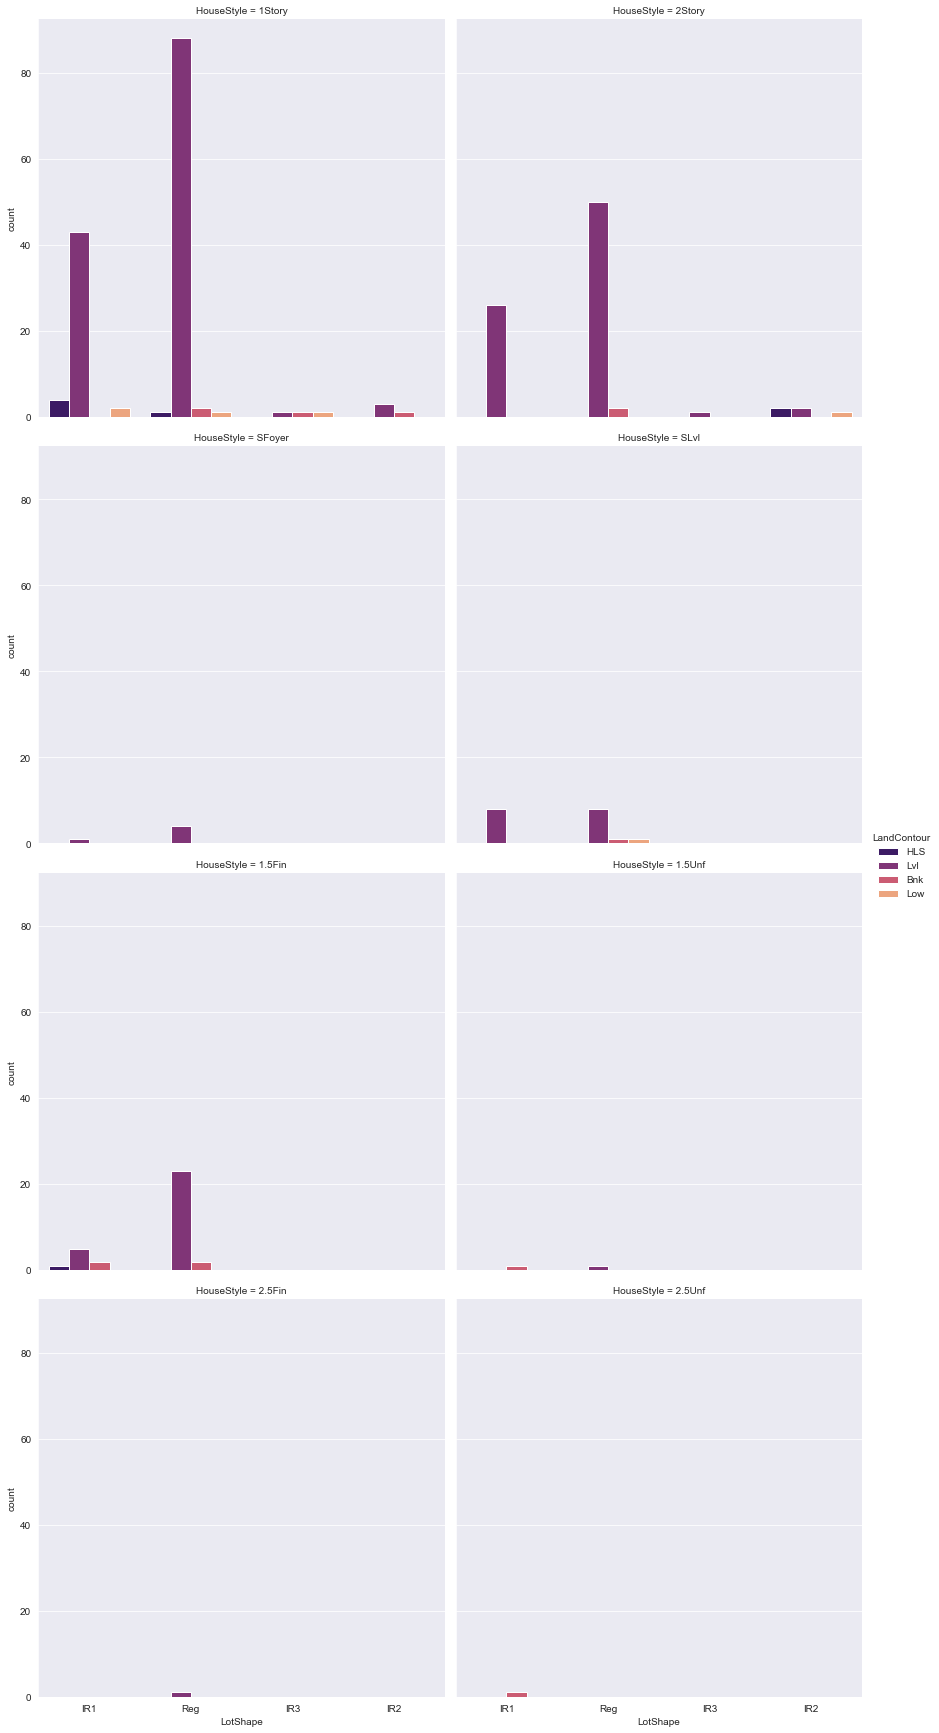

In [75]:
# catplot for analysis of categorical variables
sns.catplot(data = house,
           x="LotShape",
           hue = "LandContour",
           col_wrap = 2,
           col = 'HouseStyle',
            palette = "magma",
            kind="count",
            height = 6,
            aspect =1
            
           )

- Observation:
    - regular shaped, near flat/ level properties  are highly preferd by 1story and 2story houses

3. Analysing relationship between overallqual and overallcond with house style.

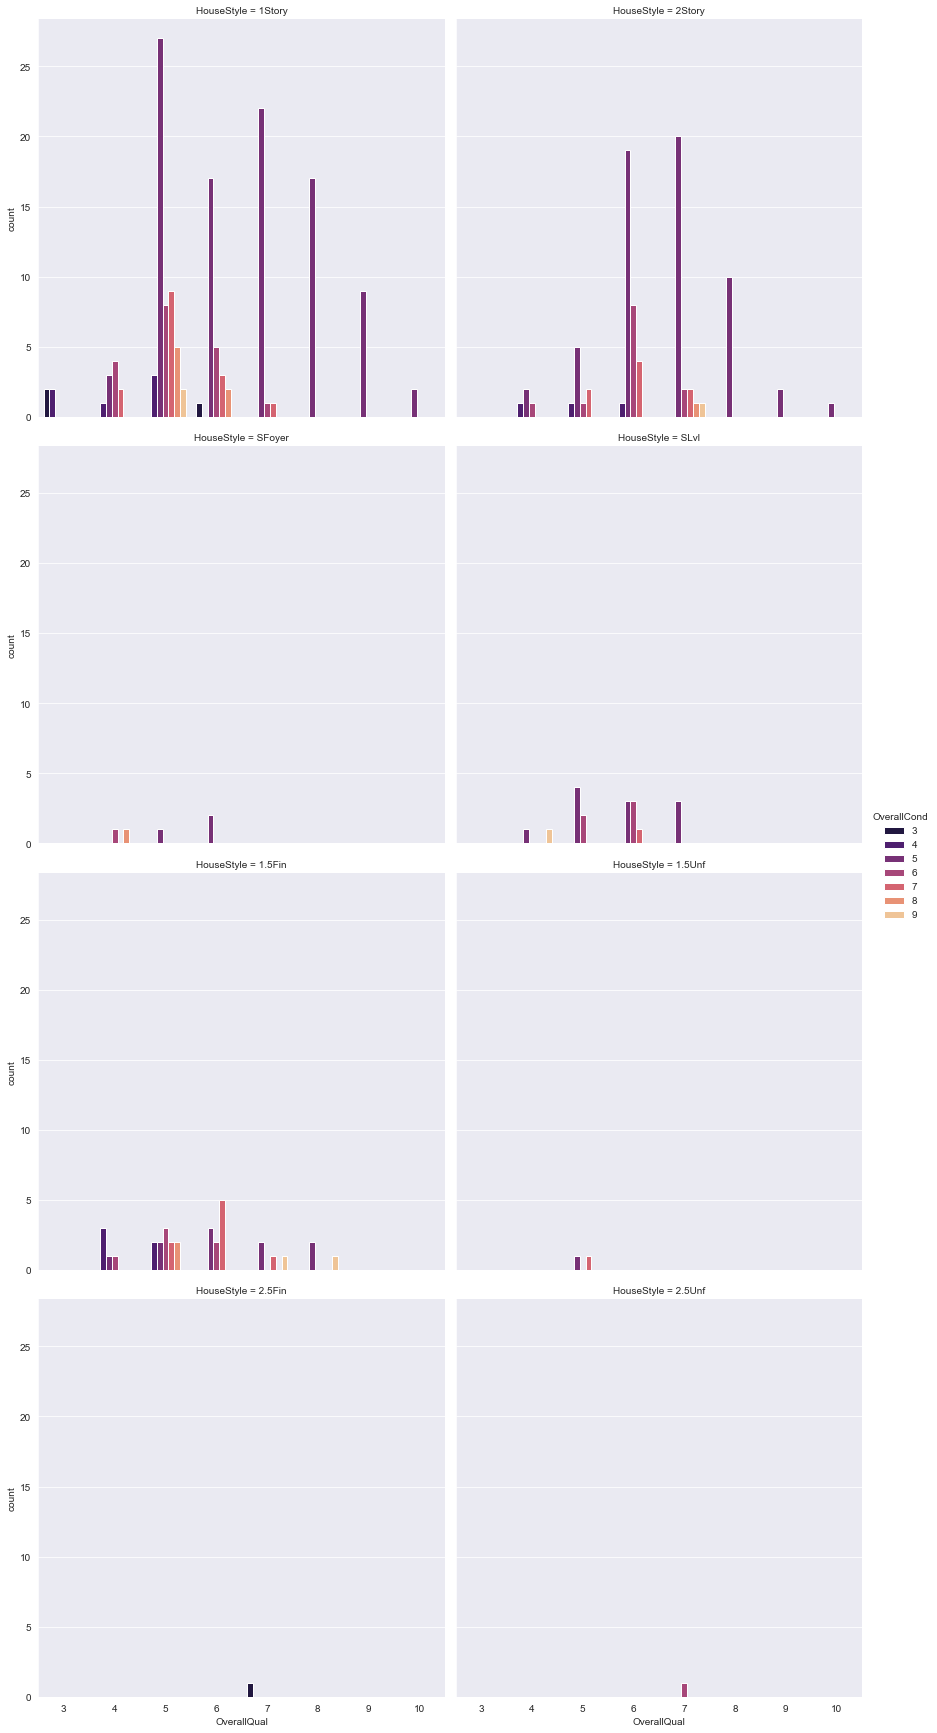

In [76]:
# catplot for analysis of categorical variables
sns.catplot(data = house,
           x="OverallQual",
           hue = "OverallCond",
           col_wrap = 2,
           col = 'HouseStyle',
            palette = "magma",
            kind="count",
            height = 6,
            aspect =1
            
           )

- Observations:
    - The most prefered house styles according to the data set are 1 story and 2 story houses and they are prefer an average overallqual and overall condition of 5 and above 

4. Create facegrid and analysis the fluctuation in sales price for each house style

In [77]:
"""#creating the facergrid
g = sns.FacetGrid(house, col="HouseStyle", col_wrap=2)
g.map_dataframe(sns.scatterplot, x="YearBuilt", y="SalePrice", color = 'g')
g.set_axis_labels("Year Built", "Sales Price")
g.add_legend()"""

'#creating the facergrid\ng = sns.FacetGrid(house, col="HouseStyle", col_wrap=2)\ng.map_dataframe(sns.scatterplot, x="YearBuilt", y="SalePrice", color = \'g\')\ng.set_axis_labels("Year Built", "Sales Price")\ng.add_legend()'

# Multivariate analysis
  

#### pairplot to find a pattern among the columns

In [78]:
# pairplot for columns 1in the house
#sns.pairplot(house)


# Data cleaning  - part 1

In [79]:
# check the datatype and information of the columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   LotConfig      292 non-null    object 
 8   LandSlope      292 non-null    object 
 9   Neighborhood   292 non-null    object 
 10  Condition1     292 non-null    object 
 11  Condition2     292 non-null    object 
 12  BldgType       292 non-null    object 
 13  HouseStyle     292 non-null    object 
 14  OverallQual    292 non-null    int64  
 15  OverallCond    292 non-null    int64  
 16  YearBuilt      292 non-null    int64  
 17  YearRemodAdd   292 non-null    int64  
 18  RoofStyle 

There are 73 columns and there are 1167 entries. However, some column are missing values and those columns can be managed
- Firstly, the missing values are handled.


### Check for null values

In [80]:
#check the null values
house.iloc[:,:30].isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage     45
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrArea       1
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         7
BsmtCond         7
BsmtExposure     7
BsmtFinType1     7
BsmtFinSF1       0
dtype: int64

In [81]:
#check the null values
house.iloc[:,30:].isnull().sum()

BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      139
GarageType        17
GarageYrBlt       17
GarageFinish      17
GarageCars         0
GarageArea         0
GarageQual        17
GarageCond        17
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
dtype: int64

In [82]:
# find percentage of missing values in fireplaceQu
FireplaceQu_percentage = (551/1168)*100
print("The percentage of null values in FireplaceQu: " + str(FireplaceQu_percentage))


The percentage of null values in FireplaceQu: 47.17465753424658


- FireplaceQu have 47% null value
- almost 50% of the value are missing in the fireplaceQu column. Therefore, we can drop the column

In [83]:
house = house.drop("FireplaceQu", axis=1)
# column dropped

In [84]:
# find percentage of missing values in fireplaceQu
LotFrontage_percentage = (214/1168)*100
print("The percentage of null values in LotFrontage: " + str(LotFrontage_percentage))


The percentage of null values in LotFrontage: 18.32191780821918


- 18% of missing data will not affect the prediction model

##### Heatmap to check null values

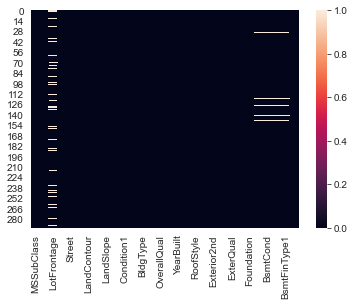

In [85]:
#check the null values
sns.heatmap(house.iloc[:,:30].isnull())

In [86]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Screen

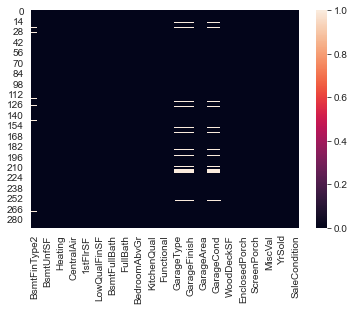

In [87]:
#check the null values
sns.heatmap(house.iloc[:,30:].isnull())

In [88]:
 # creating list of column names for null value columns
columns_with_null_values = ["LotFrontage",
"MasVnrArea",
"BsmtQual",         
"BsmtCond",        
"BsmtExposure",     
"BsmtFinType1",
"BsmtFinType2",
"GarageType",        
"GarageYrBlt",       
"GarageFinish",      
"GarageQual",     
"GarageCond"]    
 # condtional programming to identify the datatype of the null value columns    
for i in columns_with_null_values:
    print("The dtype of "+i+ " is "+ " : " + str(house[i].dtypes))



The dtype of LotFrontage is  : float64
The dtype of MasVnrArea is  : float64
The dtype of BsmtQual is  : object
The dtype of BsmtCond is  : object
The dtype of BsmtExposure is  : object
The dtype of BsmtFinType1 is  : object
The dtype of BsmtFinType2 is  : object
The dtype of GarageType is  : object
The dtype of GarageYrBlt is  : float64
The dtype of GarageFinish is  : object
The dtype of GarageQual is  : object
The dtype of GarageCond is  : object


## Using simple imputer to replace null values 

##### The replacement method is done with consideration to the following conditions

   - The mean of the numerical column data will be used to replace the null values, if the data is normally distribute
   - The median of the numerical column data will be used to replace the null values, if the data does not project normal distribution and is compromised of outliers.
   - The mode/most frequent of the categorical column will be used for columns of obejct type

In [89]:
# import simple imputer library
from sklearn.impute import SimpleImputer
#assing variables 
imp_cat = SimpleImputer(strategy = "most_frequent")
imp_median = SimpleImputer(strategy ="median")
imp_mode = SimpleImputer(strategy = "mean")


### find the distribution of numerical columns with null values

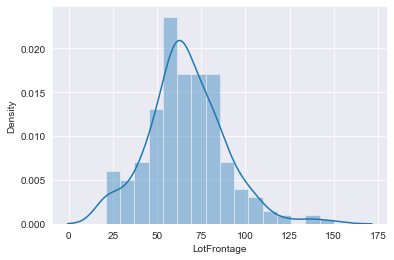

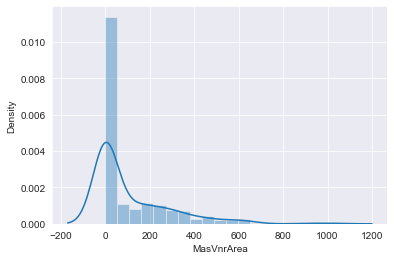

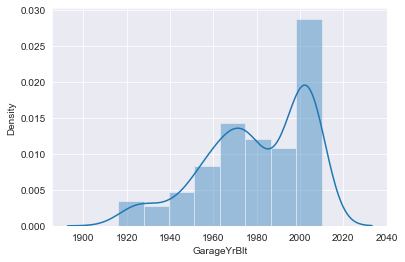

In [90]:
  
for i in columns_with_null_values:
    if house[i].dtypes == 'float64':
        sns.distplot(house[i], kde=True)
        plt.show()

- Since, none of the numerical columns with null value is normally distributed, the best replacement method is median

In [91]:
for i in columns_with_null_values:
    if house[i].dtypes == 'float64':
        house[i] = imp_median.fit_transform(house[i].values.reshape(-1,1))

In [92]:
for i in columns_with_null_values:
    if house[i].dtypes == 'object':
        house[i] = imp_cat.fit_transform(house[i].values.reshape(-1,1))

## checking for null values


In [93]:
#check the null values
house.iloc[:,:30].isnull().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
dtype: int64

In [94]:
#check the null values
house.iloc[:,30:].isnull().sum()

BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

##### All the null values are removed

# Label encoding 

- Find the number of columns with type object

In [95]:
object_house = []
for x in house.columns:
    if house[x].dtypes == 'object':
        object_house.append(x)
        

In [96]:
object_house

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [97]:
for x in object_house:
    print("The unique values for " + x + " is : " + house[x].unique())

['The unique values for MSZoning is : RL'
 'The unique values for MSZoning is : RM'
 'The unique values for MSZoning is : FV'
 'The unique values for MSZoning is : C (all)']
['The unique values for Street is : Pave'
 'The unique values for Street is : Grvl']
['The unique values for LotShape is : IR1'
 'The unique values for LotShape is : Reg'
 'The unique values for LotShape is : IR3'
 'The unique values for LotShape is : IR2']
['The unique values for LandContour is : HLS'
 'The unique values for LandContour is : Lvl'
 'The unique values for LandContour is : Bnk'
 'The unique values for LandContour is : Low']
['The unique values for LotConfig is : Corner'
 'The unique values for LotConfig is : CulDSac'
 'The unique values for LotConfig is : Inside'
 'The unique values for LotConfig is : FR2'
 'The unique values for LotConfig is : FR3']
['The unique values for LandSlope is : Gtl'
 'The unique values for LandSlope is : Mod'
 'The unique values for LandSlope is : Sev']
['The unique values

TypeError: can only concatenate str (not "float") to str

In [ ]:
for x in object_house:
    if house[x].nunique() > 3:
         print(x + " : " + str(house[x].nunique()) + " use label encoding")
         print("\n")
    else:
        print(x + " : " + str(house[x].nunique()) + " use one hot encoding")
        
        

- Since, the unique values are identified. The most suitable encoding technique will be used.

## Label encoding

In [ ]:
# import the library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in object_house:
    if house[x].nunique() > 2:
        house[x] = le.fit_transform(house[x])

In [ ]:
#checking datatype after label encoding
house.iloc[:, :30].dtypes

In [ ]:
#checking datatype after label encoding
house.iloc[:, 30:].dtypes

## OneHotEncoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#binary encoder for columns with 2 or 3 unique values
onehot_encode = OneHotEncoder()
for x in object_house:
    if house[x].nunique() <= 2:
        house[x] = onehot_encode.fit_transform(house[x].values.reshape(-1,1)).toarray()


In [ ]:
#checking datatype after one hot encoding
house.iloc[:, :30].dtypes

In [ ]:
#checking datatype after one hot encoding
house.iloc[:, 30:].dtypes

In [ ]:
house['GarageFinish'].unique()

In [ ]:
house

 -  Step 1 of the data cleaning process is done.
 -  All the object type columns are transformed into numerical values
 -  Step 2 of the data cleaning process is to check skewness and remove the outliers

 ###### A heatmap to find the correlation among variables

In [ ]:
# plot heatmap to find the correlation

correlation_matrix_house = house.corr()

plt.figure(figsize = [50,48])
sns.heatmap(correlation_matrix_house, annot=True)
plt.title("Correlation matrix for house")
plt.show()

 -  The complexity of heatmap, hinders clear interpretation of multicolinearity.

#### Check for multicolinearity

- Identify multicollinearity of records 

In [ ]:
house.dtypes

In [ ]:
# import libraries
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# fucntion to find multicollinearity
def find_multicollinearity(data):
    variance = pd.DataFrame()
    data = sma.add_constant(data)
    variance["COLUMN NAME"] = data.columns
    variance["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return(variance)
    
    

### variance_inflation_factor
 - THE VIF IS A MEASURE OF COLINEARITY AMONG PREDICTOR VARIABLES WITHIN A MULTIPLE REGRESSION. IT IS CALCULATED BY TAKING THE RATIO OF THE VARIANCE OF ALL A GIVEN MODEL'S BETAS DIVIDED BY THE VARIANCE OF A SINGLE BETA IF IT WERE FIT ALONE
 
- The VIF is the reciprocal of tolerance value; small VIF value indicates low correlation among variables under ideal conditions VIF<3. However, it is acceptable if it is less than 10

In [ ]:
find_multicollinearity(house.iloc[:,:30])

##### the Exterior1st and Exterior2nd are two cmolumns with a moderate multicollinearity 

In [ ]:
find_multicollinearity(house.iloc[:,30:])

##### 1stFlrSF	inf, 10	2ndFlrSF	inf, 11	LowQualFinSF	inf, 12	GrLivArea	inf
- Severe multi-colinearity 


# Data cleaning - part 2
   ## checking for skewness and removal

In [ ]:
# skew distribution with distplot
for i in house.columns:
    sns.distplot(house[i], kde=True)
    plt.show()

In [ ]:
house.iloc[:,:30].skew()

In [ ]:
house.iloc[:,30:].skew()

 - The dataset is skewed and hence we perform power_tranformation function to remove skewness

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
house_ = pt.fit_transform(x)

#create the new dataframe
house_new = pd.DataFrame(house_, columns = x.columns)

In [ ]:
house_new.iloc[:,:30].skew()

In [ ]:
house_new.iloc[:,30:].skew()

    MSSubClass - removed
    LotFrontage - removed 
    LotArea - removed
    OverallQual  -  removed
    OverallCond   -  remvoved
    YearBuilt     - removed
    YearRemodAdd    - removed
    MasVnrArea    - removed
    BsmtFinSF1   - removed
    BsmtFinSF2  - not removed     
    BsmtUnfSF  -  removed

    TotalBsmtSF - removed
    1stFlrSF  -    removed
    2ndFlrSF   -   removed
    LowQualFinSF   - not removed 
    GrLivArea     -  removed
    BsmtFullBath   - removed
    BsmtHalfBath   - not removed  
    FullBath       - removed
    HalfBath       -  reoved
    BedroomAbvGr   - removed
    KitchenAbvGr   - not removed
    WoodDeckSF     - removed

    TotRmsAbvGrd  -  removed
    OpenPorchSF    - removed
    EnclosedPorch  - not removed
    3SsnPorch     - not removed
    ScreenPorch    - not removedA
    PoolArea       - not removed
    WoodDeckSF     - removed

    MiscVal        - not removd  
    MoSold        - removed
    YrSold        - removed



In [ ]:
house = house_new 

 - Few columns are right skewed

##### since there is a 50% loss of data, the outliers are not removed 

### apply scaling to minimize the difference in range

In [ ]:
from sklearn.preprocessing import StandardScaler
# Use standard scalar
scale = StandardScaler()
house = scale.fit_transform(house)

## Conclusion

In [ ]:
import gzip, pickle
with gzip.open("housefinal.pklz", 'rb') as ifp:
    price = pickle.load(ifp)

In [ ]:
import joblib
salesprice = joblib.load("housefinal.pklz")

In [246]:
price

array([405686.99649496, 126638.74741092, 227021.80570369, 169901.06757659,
       277774.53267054, 180431.63457466, 207843.39742811, 170946.75127395,
       170837.81923613, 135303.91423541, 160777.1107331 , 124189.13664491,
       160547.21804   , 129137.48854329, 227654.90411145, 185070.95000365,
       119045.95888321, 133066.74684981,  81902.66899589, 377416.96401054,
       121055.03321146, 145594.35180165, 142260.24221218, 146931.09937518,
       174649.22537739, 287748.66230318, 242088.1030914 , 111096.11588634,
       123606.28593851, 195059.69075005, 244826.59801904, 127669.15950172,
       384507.7469268 , 123634.08478327, 196196.94986665, 221433.56484782,
       132962.74990828, 112151.38327162, 144631.74967018, 246600.20243207,
       249127.25381152, 267043.94816055, 155185.45196166, 128979.37663926,
       145355.26512836, 238708.04571881, 189171.69179818, 131767.6513259 ,
       228313.76833115, 359401.18559478, 158735.3348751 , 108889.23402074,
       155990.4996324 , 1

## -------------------------------END-------------------------------------